# Artificial Intelligence Course - Spring 1403
## Computer Assignment #4 - Machine Learning

## 1) Checking the dataset

In [176]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

### Q1. Get the general data storage with the info and describe methods.

In [177]:
df = pd.read_excel("DataSet.xlsx")

In [178]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7     NaN   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [180]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     33.104049    6.527286  203.542157  180.670077   87.585243  121.174519   
min      1.137000    1.129600    1.000000   20.200000    2.600000    0.320000   
25%     32.000000    2.425900    4.000000  254.000000   17.000000  370.415000   
50%     65.250000    3.917500    5.000000  307.000000   18.900000  390.885000   
75%     89.975000    6.341400   24.000000  403.000000   20.200000  395.630000   
max    100.000000   24.000000  666.000000  711.000000  396.900000  396.900000   

            LSTAT        MEDV  
count  506.000000  452.000000  
mean    11.537806   23.750442  
std      6.064932    8.808602  
min      1.730000    6.300000  
25%      6.877500   18.500000  
50%     10.380000   21.950000  
75%     15.015000   26.600000  
max     34.410000   50.000000

In [181]:

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

      CRIM     ZN  INDUS  CHAS    NOX       RM      AGE     DIS  RAD    TAX  \
0    0.006   18.0   2.31   0.0  0.538    6.575   65.200   4.090    1  296.0   
1    0.027    0.0   7.07   0.0  0.469    6.421   78.900   4.967    2  242.0   
2    0.027    0.0   7.07   0.0  0.469    7.185   61.100   4.967    2  242.0   
3    0.032    0.0   2.18   0.0  0.458    6.998   45.800   6.062    3  222.0   
4    0.069    0.0   2.18   0.0  0.458    7.147   54.200   6.062    3  222.0   
5    0.030    0.0   2.18   0.0  0.458    6.430   58.700   6.062    3  222.0   
6    0.088   12.5   7.87   0.0  0.524    6.012   66.600   5.561    5  311.0   
7    0.145   12.5   7.87   0.0  0.524    6.172   96.100   5.950    5  311.0   
8    0.211   12.5   7.87   0.0  0.524    5.631  100.000   6.082    5  311.0   
9    0.170   12.5   7.87   0.0  0.524    6.004   85.900   6.592    5  311.0   
10   0.225   12.5   7.87   0.0  0.524    6.377   94.300   6.347    5  311.0   
11   0.117   12.5   7.87   0.0  0.524    6.009   82.

### Q2.There might be some missing values in each column. For each feature, obtain the number and proportion of missing data in Table 

In [182]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [183]:
(df.isnull().sum() / len(df)) * 100

CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        5.138340
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         5.335968
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           3.952569
LSTAT       0.000000
MEDV       10.671937
dtype: float64

### Q3. Graph the number of unique values ​​for each feature and explain them.
As seen above, the less the unique features,the more probability of being categorical feature or discrete feature.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

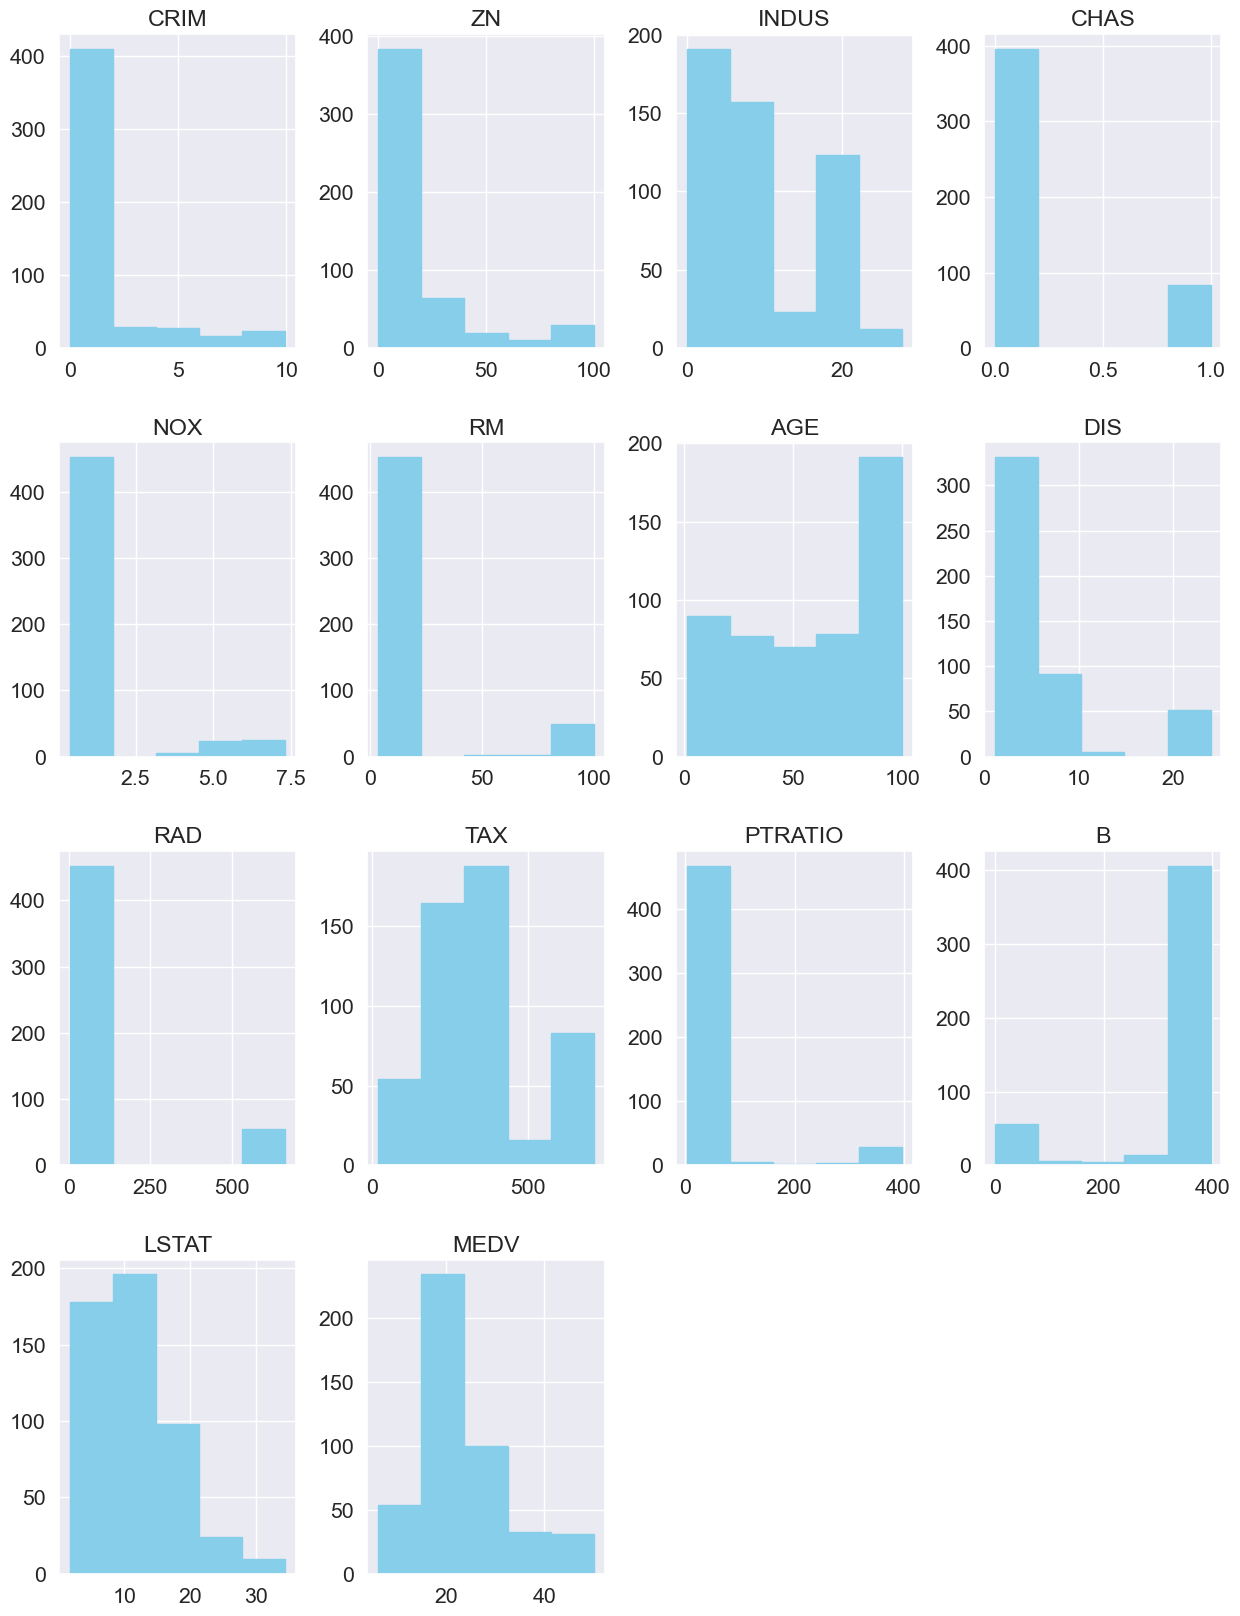

In [184]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(bins=5,ax=ax,color = "skyblue",ec="skyblue")

In [185]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
colors = ["red","green","blue","orange","pink","purple","brown"]

Text(0.5, 1.0, 'CRIM')

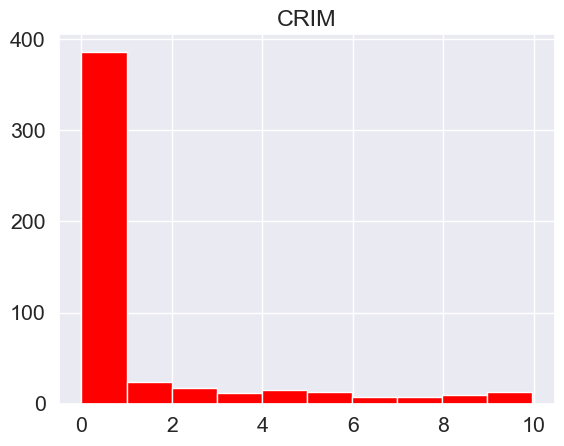

In [186]:
i = 0
df['CRIM'].hist(color = colors[i//2])
plt.title("CRIM")

Text(0.5, 1.0, 'ZN')

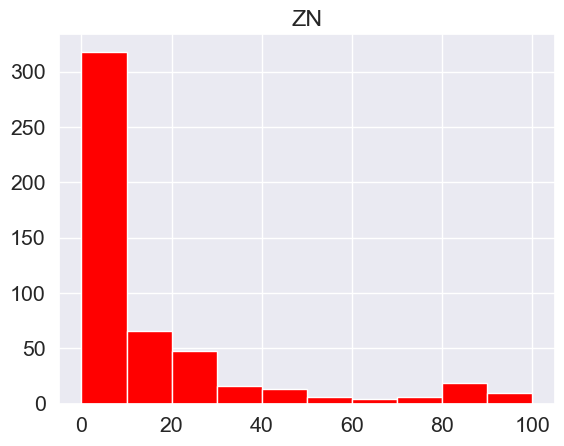

In [187]:
i += 1
df['ZN'].hist(color = colors[i//2])
plt.title("ZN")

Text(0.5, 1.0, 'INDUS')

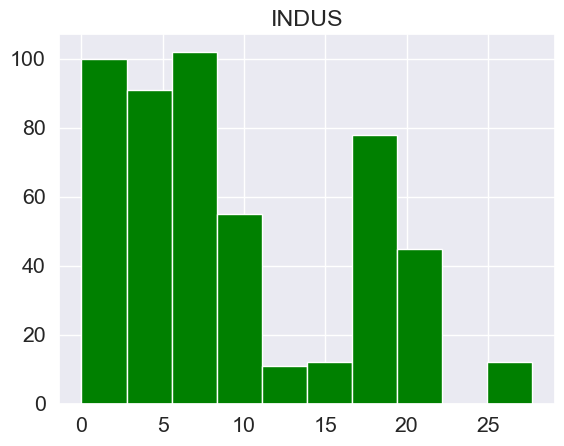

In [188]:
i+=1
df['INDUS'].hist(color = colors[i//2])
plt.title("INDUS")

Text(0.5, 1.0, 'NOX')

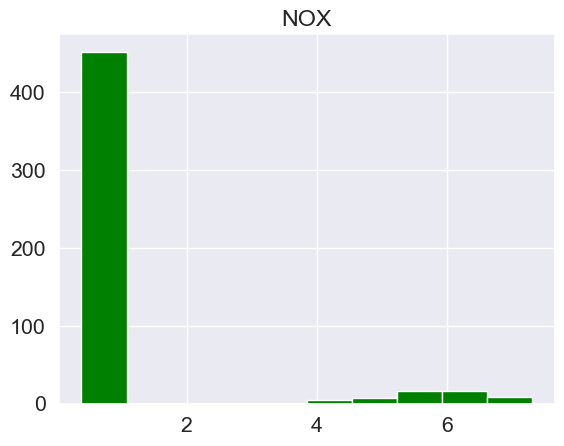

In [189]:
i+=1
df['NOX'].hist(color = colors[i//2])
plt.title("NOX")

Text(0.5, 1.0, 'RM')

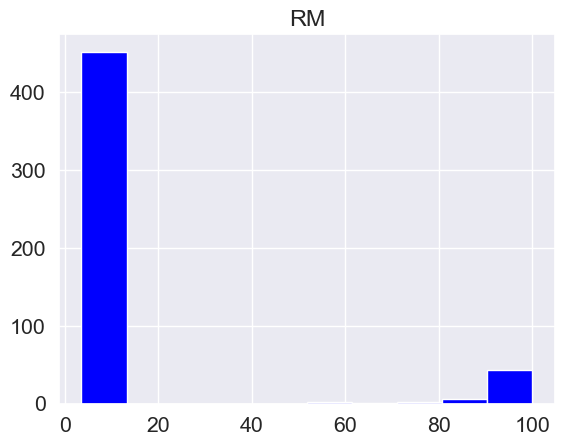

In [190]:
i+=1
df['RM'].hist(color = colors[i//2])
plt.title("RM")

Text(0.5, 1.0, 'AGE')

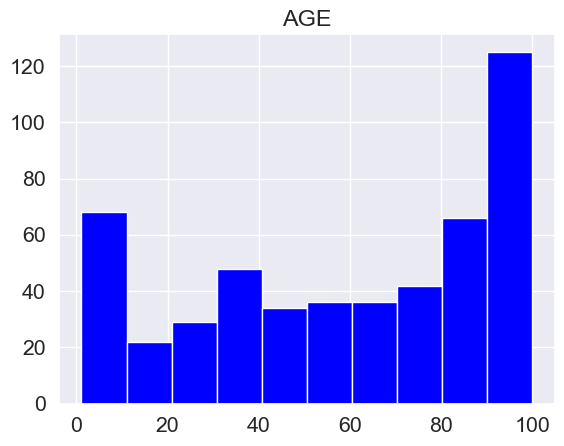

In [191]:
i+=1
df['AGE'].hist(color = colors[i//2])
plt.title("AGE")

Text(0.5, 1.0, 'DIS')

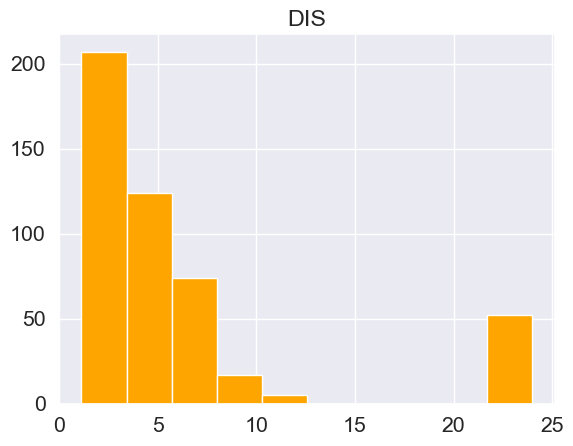

In [192]:
i+=1
df['DIS'].hist(color = colors[i//2])
plt.title("DIS")

Text(0.5, 1.0, 'RAD')

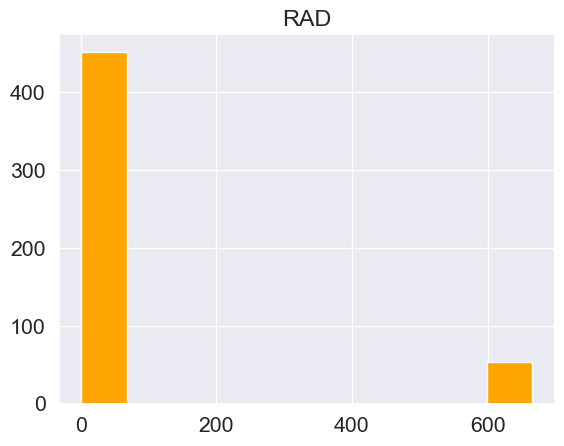

In [193]:
i+=1
df['RAD'].hist(color = colors[i//2])
plt.title("RAD")

Text(0.5, 1.0, 'TAX')

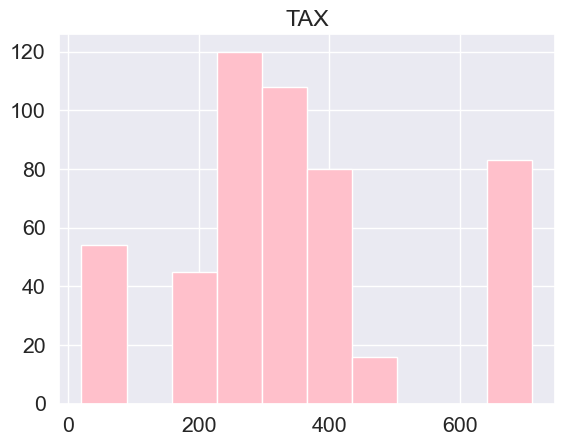

In [194]:
i+=1
df['TAX'].hist(color = colors[i//2])
plt.title("TAX")

Text(0.5, 1.0, 'PTRATIO')

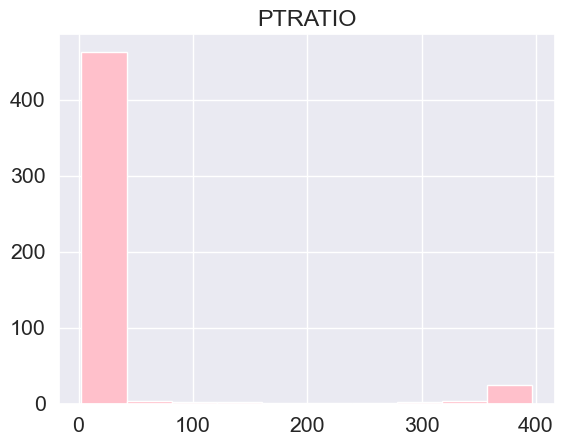

In [195]:
i+=1
df['PTRATIO'].hist(color = colors[i//2])
plt.title("PTRATIO")

Text(0.5, 1.0, 'B')

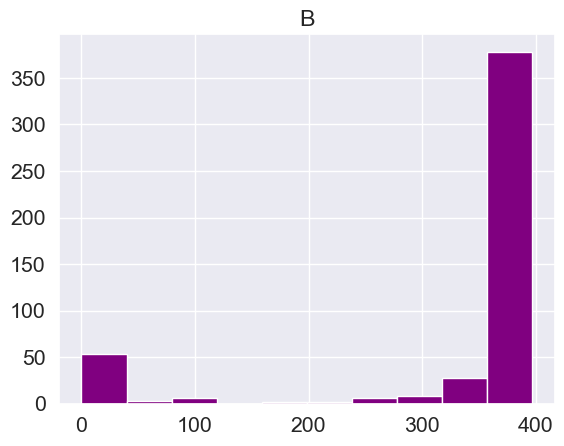

In [196]:
i+=1
df['B'].hist(color = colors[i//2])
plt.title("B")

Text(0.5, 1.0, 'LSTAT')

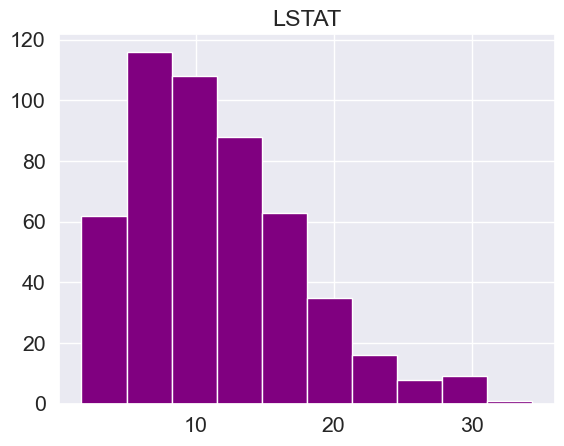

In [197]:
i+=1 
df['LSTAT'].hist(color = colors[i//2])
plt.title("LSTAT")

Text(0.5, 1.0, 'MEDV')

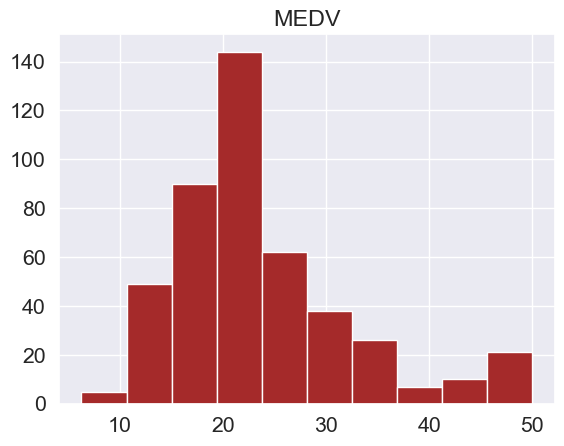

In [198]:
i+=1
df['MEDV'].hist(color = colors[i//2])
plt.title("MEDV")

In [199]:
nu = df.nunique().reset_index()
nu

index    0
0      CRIM  452
1        ZN   27
2     INDUS   77
3      CHAS    2
4       NOX  132
5        RM  437
6       AGE  399
7       DIS  343
8       RAD   10
9       TAX   67
10  PTRATIO   85
11        B  357
12    LSTAT  445
13     MEDV  210

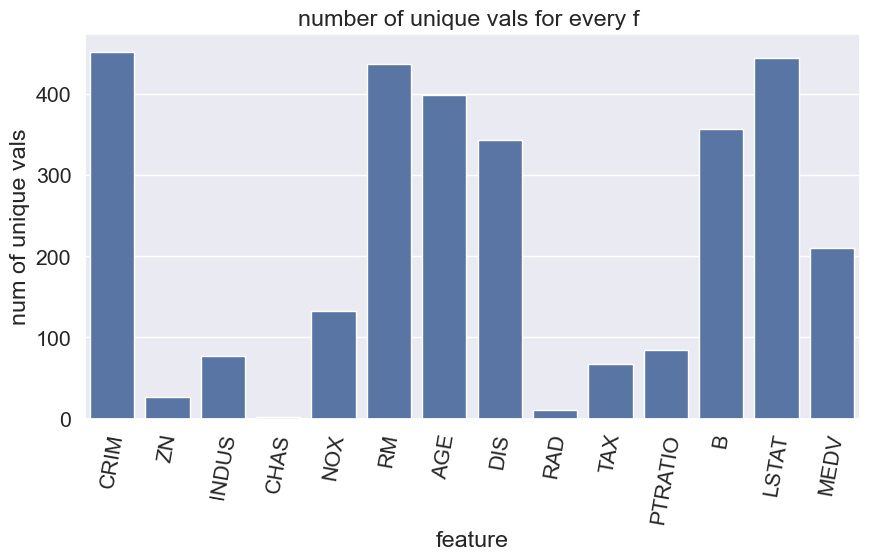

In [200]:
plt.figure(figsize=(10,5))
plt.title("number of unique vals for every f ")
plt.xticks(rotation = 80)
nu.columns = ['feature','num of unique vals']
ax = sns.barplot(x='feature', y='num of unique vals', data=nu)

### Q4. Draw a diagram of the dependence of the features on each other.Explain about this diagram and tell which features are more dependent on the target column?

##### In machine learning, understanding the dependence of features on each other is crucial for building accurate models. Let’s delve into this topic

1. **Feature Interaction:**
    ##### When features interact with each other in a prediction model, the prediction cannot be expressed as the simple sum of individual feature effects. This is because the effect of one feature depends on the value of another feature.
    ##### For example, consider a model predicting house prices using two features: house size (big or small) and location (good or bad). If there’s no interaction, the prediction would be a sum of the individual feature effects.
    ##### However, when interaction exists, the prediction becomes more complex. Let’s break it down:

2. **Without Interaction:**
 
    ##### Suppose we have the following predictions:

    ##### Good location, big house: 400,000

    ##### Good location, small house: 200,000

    ##### Bad location, big house: 250,000

    ##### Bad location, small house: 150,000

    ##### Decomposing the prediction:
    ##### Constant term: 150,000

    ##### Size effect (big vs. small): +100,000 (always)

    ##### Location effect (good vs. bad): +50,000 (always)

    ##### No interaction effect because the prediction is a sum of individual feature effects.

4. **With Interaction:** Now let’s consider a different scenario:
    ##### Good location, big house: 400,000

    ##### Good location, small house: 200,000

    ##### Bad location, big house: 250,000

    ##### Bad location, small house: 150,000

    ##### Decomposing the prediction:
    ##### Constant term: 150,000

    ##### Size effect (big vs. small): +100,000 (always)

    ##### Location effect (good vs. bad): +50,000 (always)

    ##### Interaction effect (big house in good location): +100,000

    ##### Here, the interaction depends on both size and location. When a house is big and in a good location, the prediction increases by an additional $100,000.

5. **Measuring Interaction Strength:**
    ##### One way to estimate interaction strength is using the H-statistic, introduced by Friedman and Popescu (2008). It measures how much prediction variation depends on feature interactions.
    ##### Visualizing interaction effects can be done using techniques like Partial Dependence Plots (PDP), which show how features vary with predictions123.
As seen above,RM and after that ZN and B are more dependent on the target column.RM has approximately a linear relationship with MDEV and LSTAT has negative linear relationship with MDEV.

<Axes: >

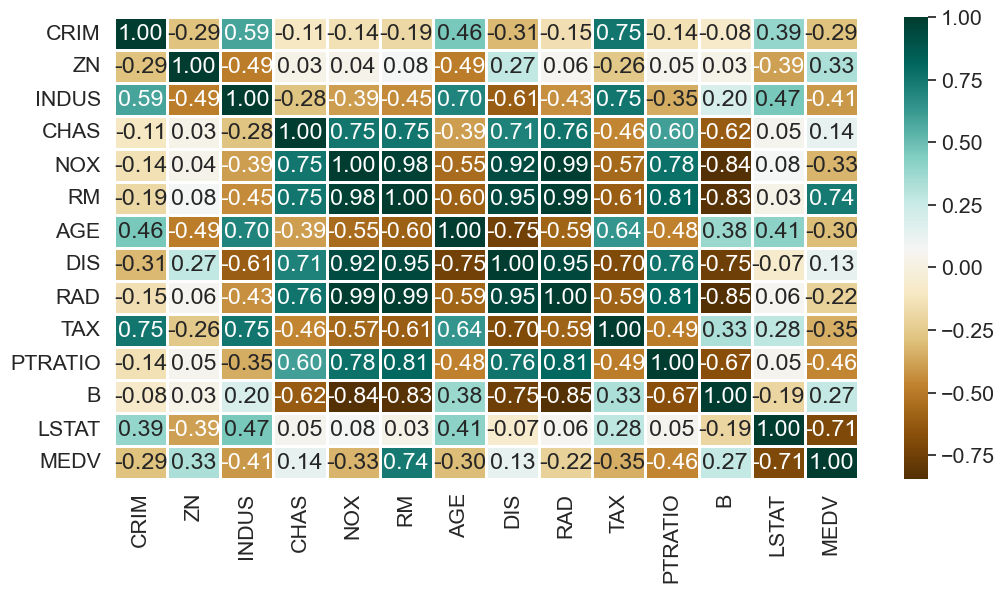

In [201]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Q5. Scatter and hexbin plots are usually used to check feature correlations. Use these charts to check dependencies with the target column. Briefly explain the use and meaning of each.

Let’s explore scatter plots and hexbin plots, both of which are valuable tools for visualizing data and understanding feature dependencies:

1. **Scatter Plots:** A scatter plot is a common type of 2-dimensional plot used to display the distribution of data points. In a scatter plot, each data point is represented as a single dot on the graph.
   
   1. **Use:** Scatter plots are useful for showing the relationship between two continuous variables (usually X and Y).
      
        They help identify patterns, trends, and potential outliers.
      
        Scatter plots are commonly used in exploratory data analysis (EDA) and regression analysis.

   2. **Meaning:** The position of each dot represents the values of the two variables (X and Y) for a specific data point.
    
        The scatter plot allows us to visually assess whether there is a linear or non-linear relationship between the variables.
      
        The closer the dots are to forming a straight line, the stronger the correlation between the variables.

2. **Hexbin Plots:** A hexbin plot is an alternative to scatter plots, especially when dealing with large datasets.
Unlike traditional scatter plots, where each data point is a single dot, hexbin plots aggregate data points into hexagonal bins.
   
   1. **Use:** Scatter plots are useful for showing the relationship between two continuous variables (usually X and Y).
      
      They help identify patterns, trends, and potential outliers.
      
      Scatter plots are commonly used in exploratory data analysis (EDA) and regression analysis.

   2. **Meaning:** The hexagons represent regions of the graphing space.
      
        The color of each hexagon is determined by aggregating the data points within that hexagon (usually by taking the mean of a third variable, such as the target column).
      
        The color gradient indicates the density of data points within each hexagonal area.
      
        Hexbin plots are especially powerful when visualizing geospatial data, as they resemble maps and can reveal spatial patterns.

eveal spatial patterns.
In summary, scatter plots are great for exploring relationships between two continuous variables, while hexbin plots are excellent for handling large datasets and spatially dependent data. Both provide valuable insights into feature dependencies! 


<Axes: xlabel='MEDV', ylabel='LSTAT'>

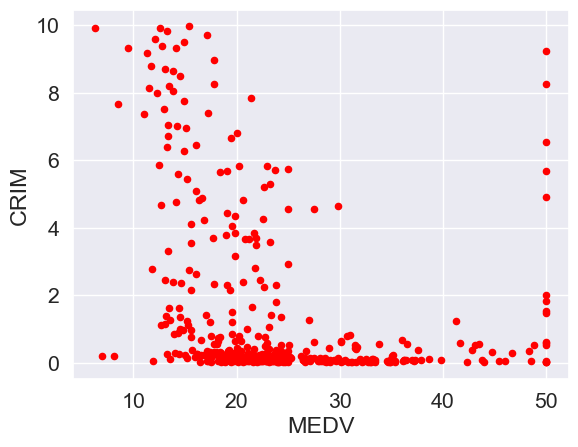

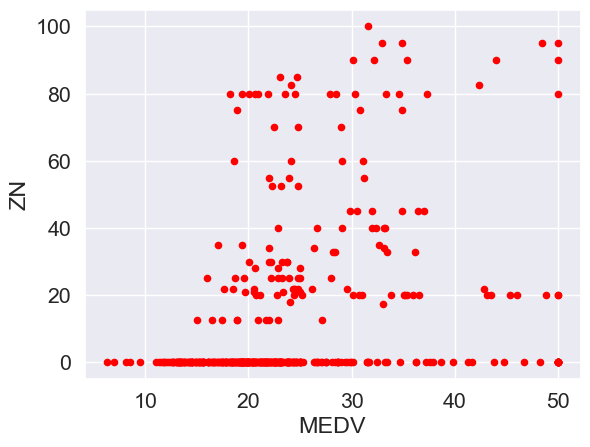

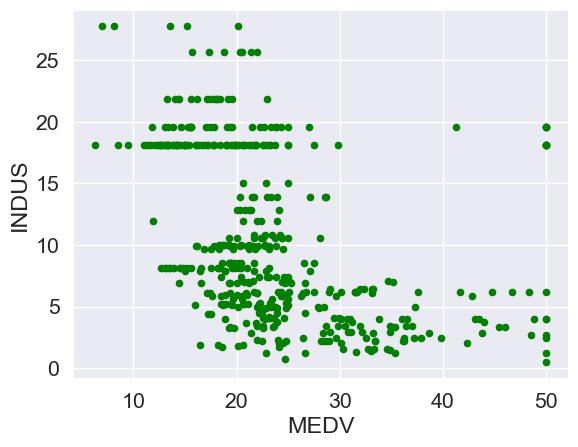

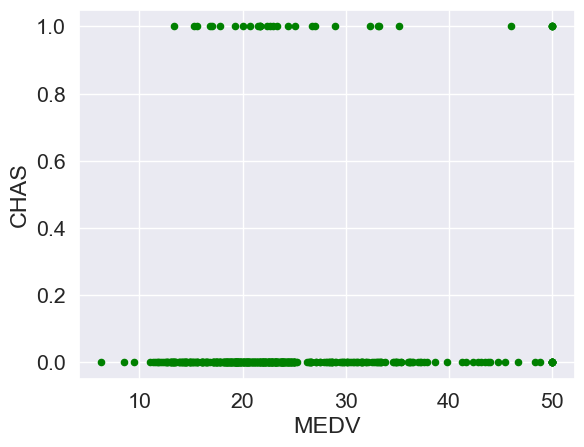

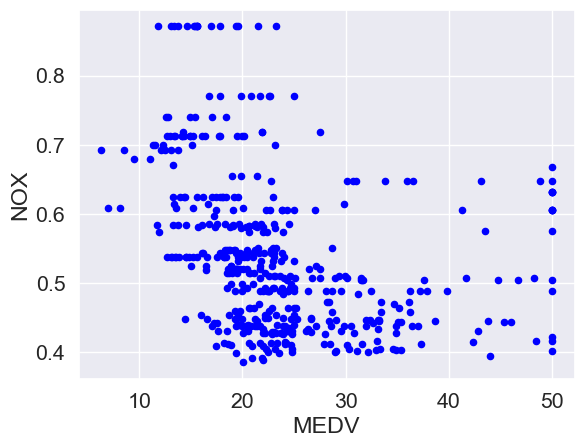

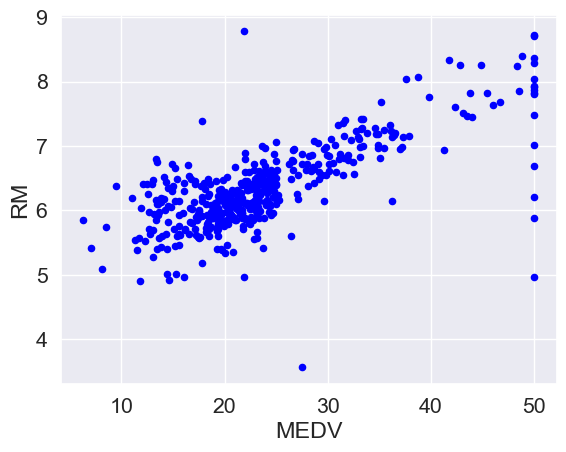

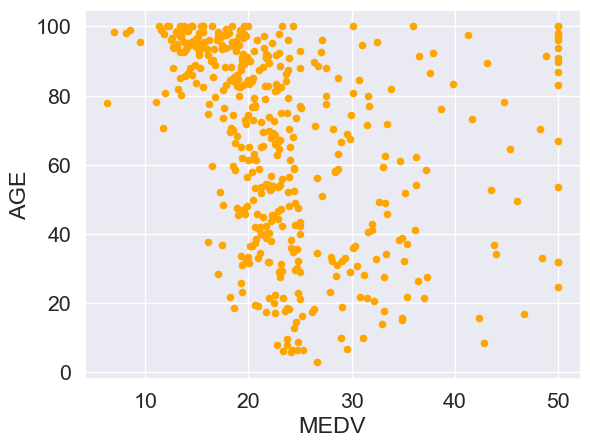

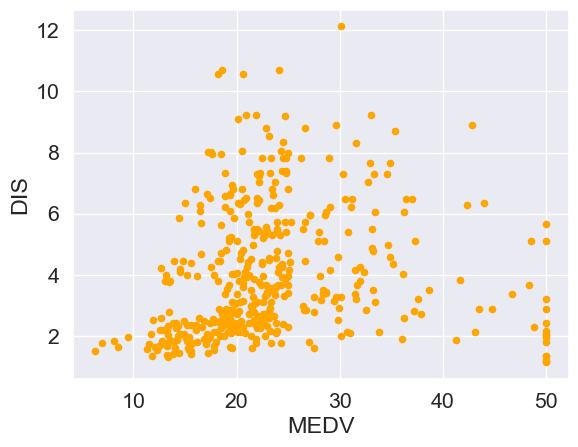

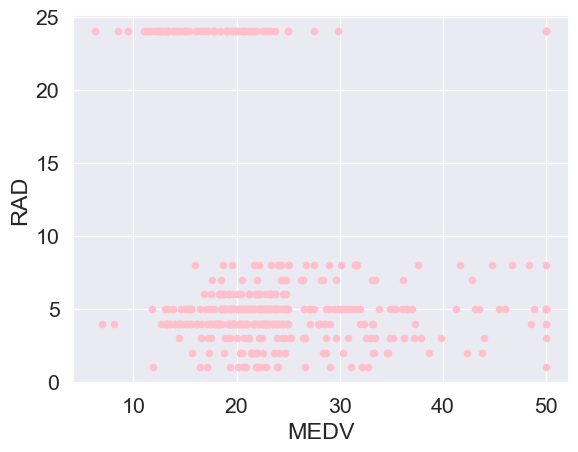

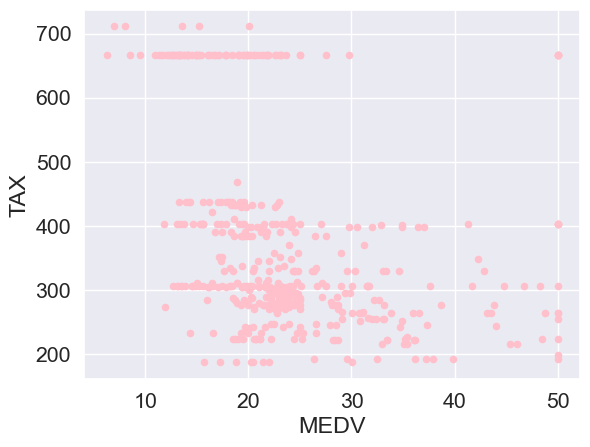

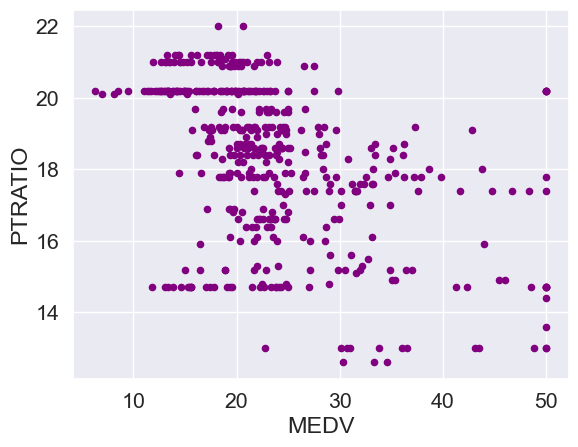

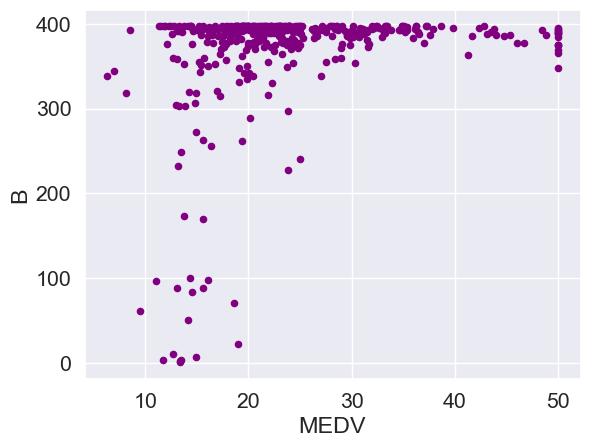

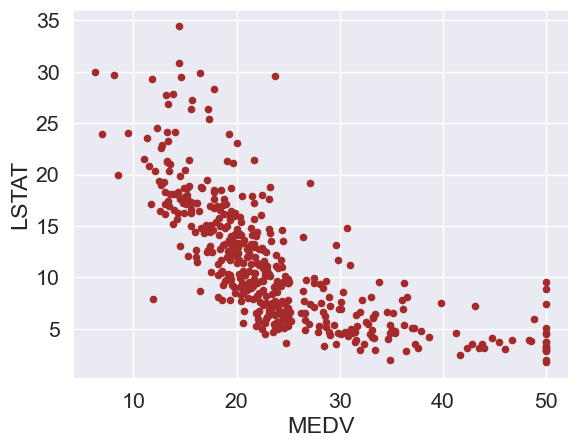

In [202]:
i = 0 
df.plot.scatter(x= 'MEDV',y = 'CRIM',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'ZN',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'INDUS',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'CHAS',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'NOX',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'RM',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'AGE',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'DIS',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'RAD',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'TAX',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'PTRATIO',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'B',color = colors[i//2])
i += 1
df.plot.scatter(x= 'MEDV',y = 'LSTAT',color = colors[i//2])

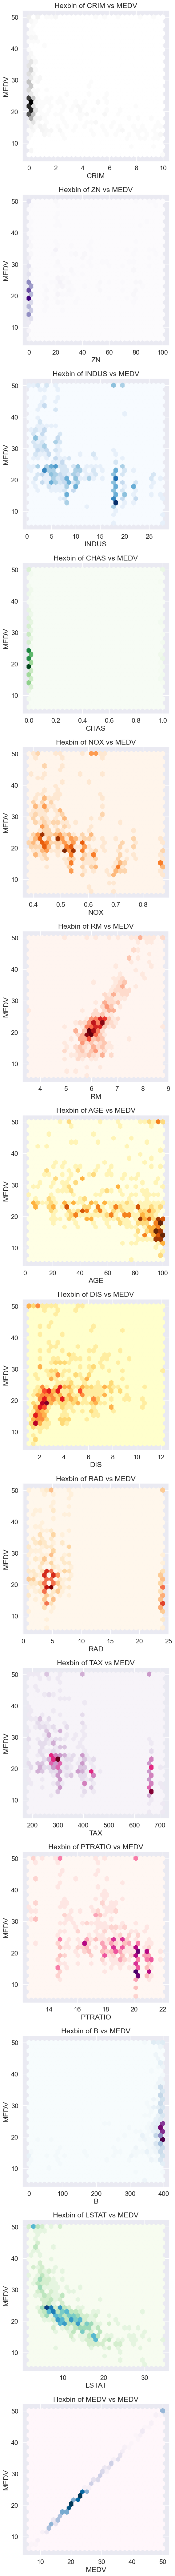

In [203]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(6, 6*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    axes[i].hexbin(df[col], df["MEDV"], gridsize=30, cmap=cmaps[i])
    axes[i].set_title(f"Hexbin of {col} vs MEDV")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MEDV")

plt.tight_layout()
plt.show()

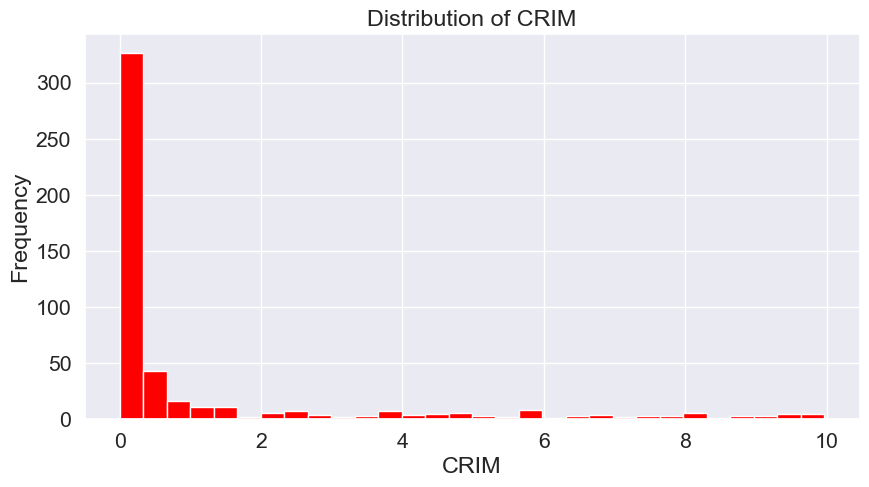

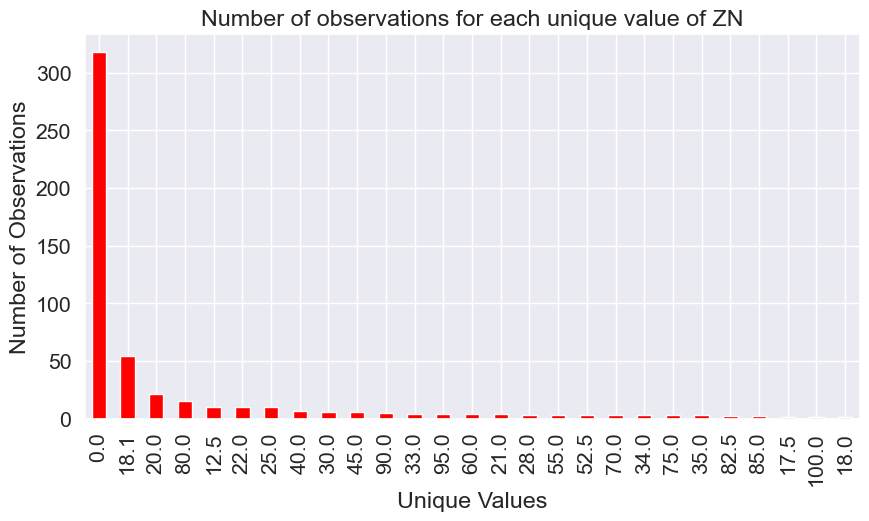

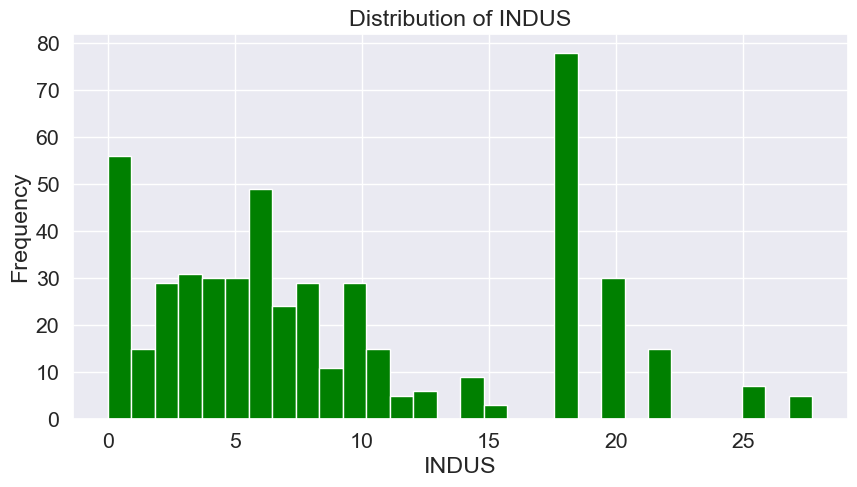

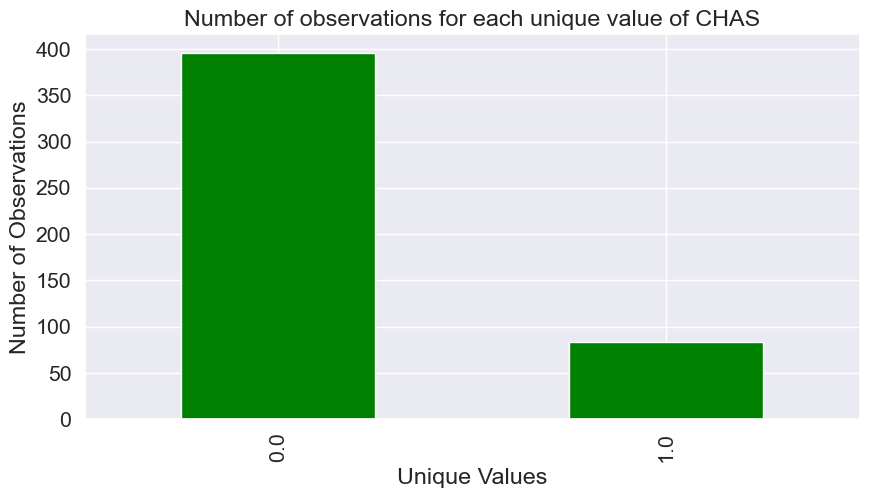

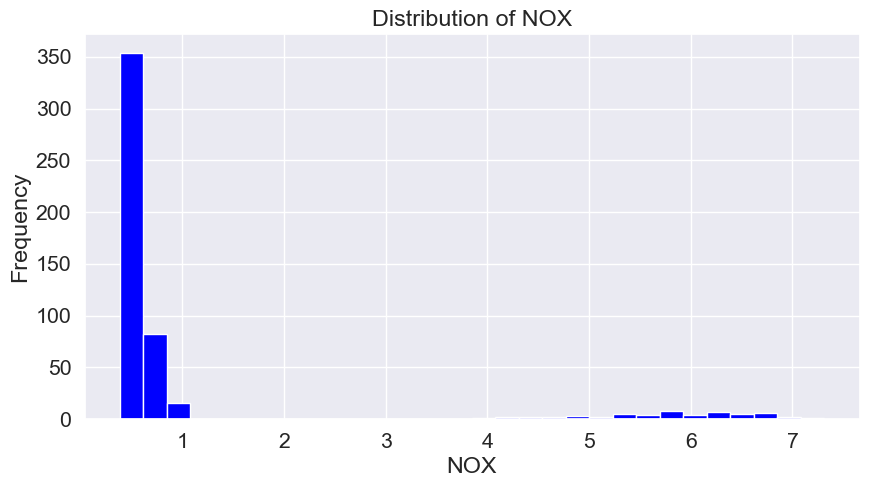

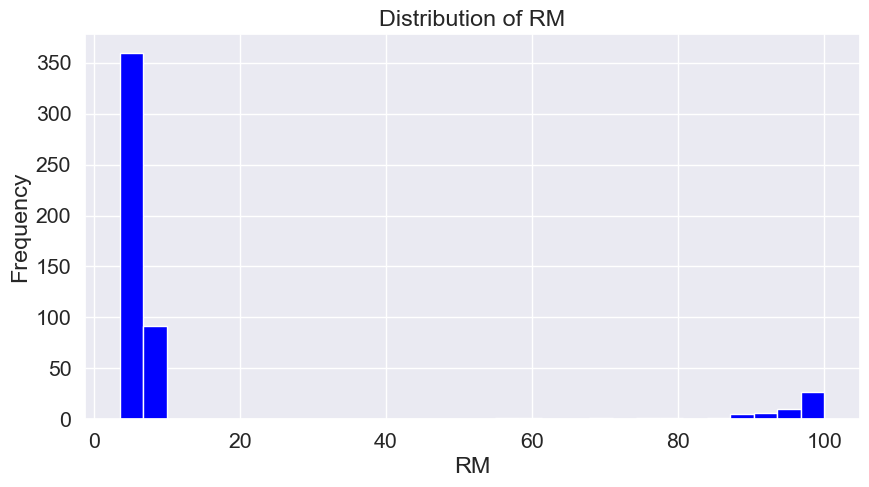

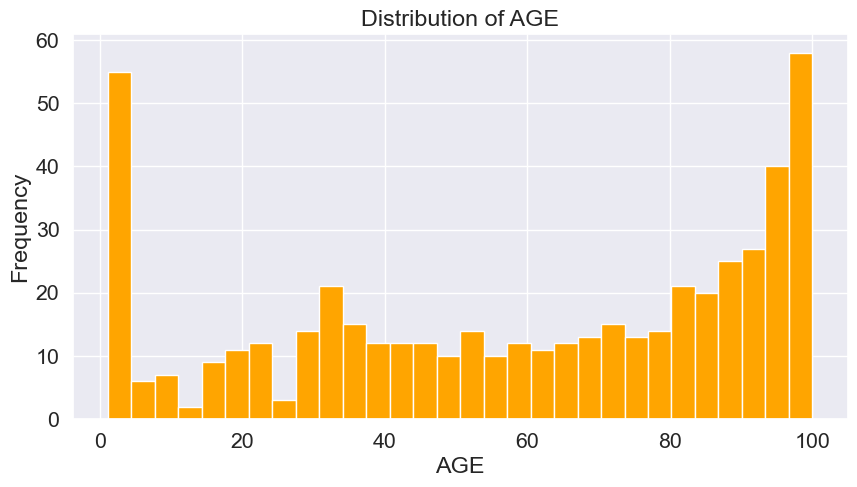

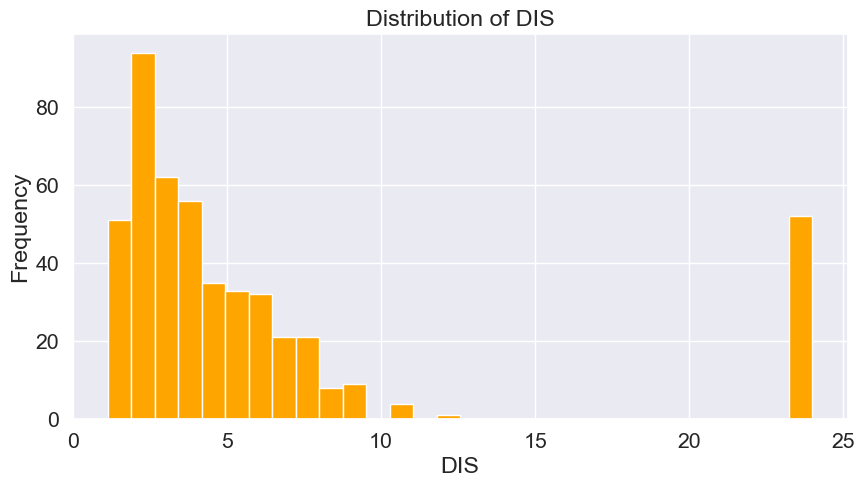

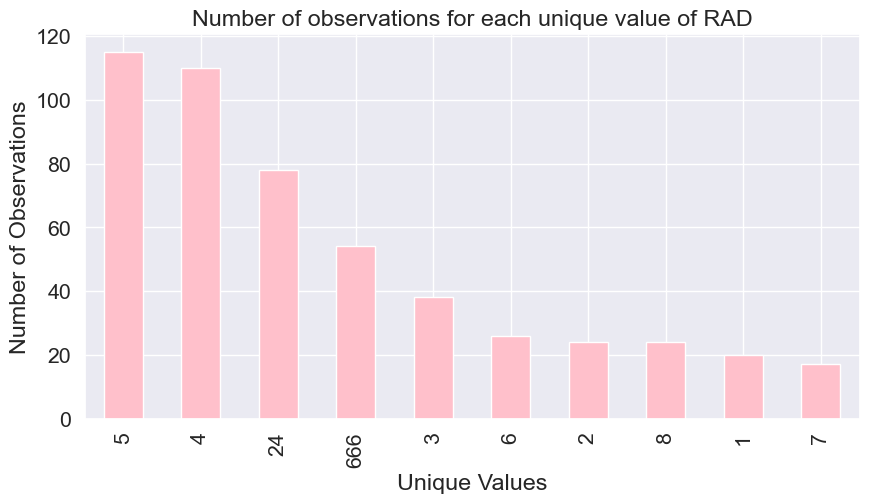

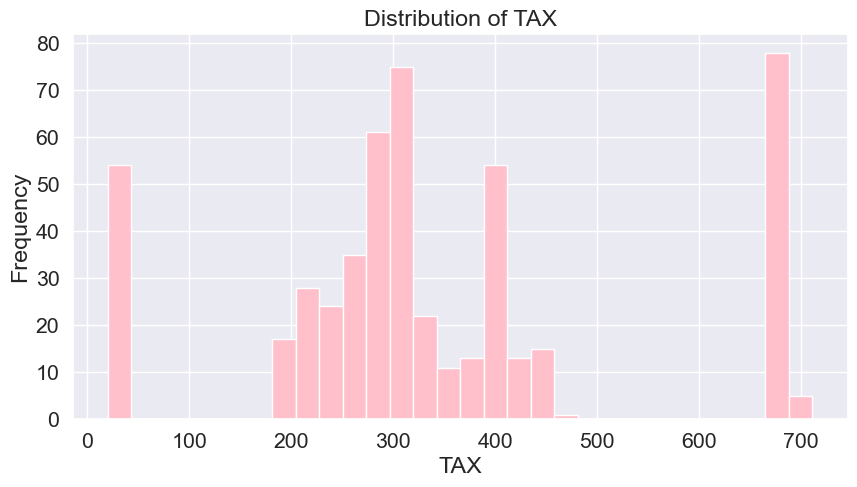

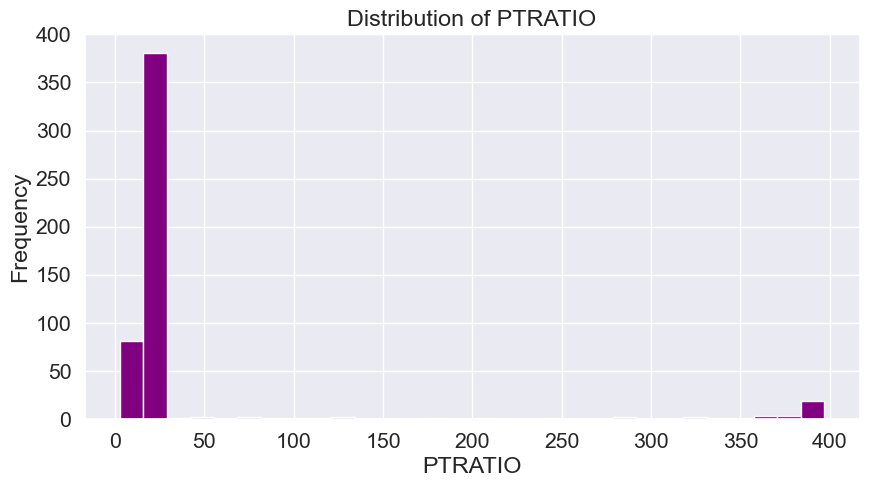

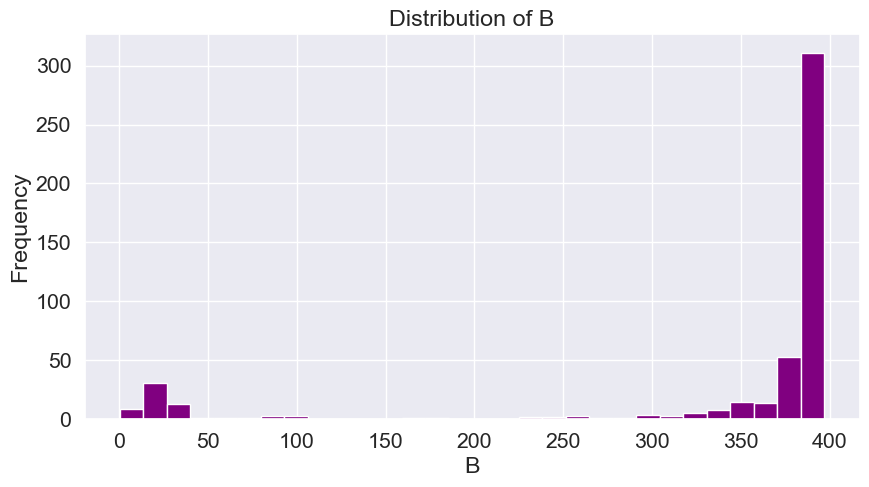

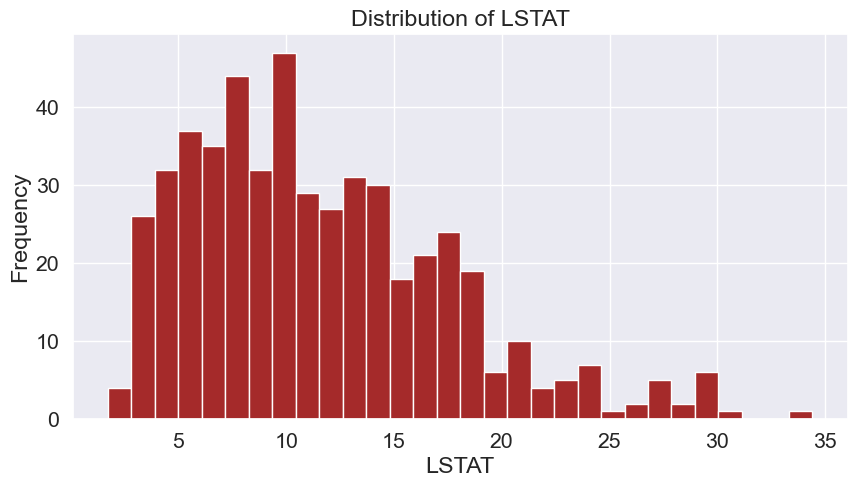

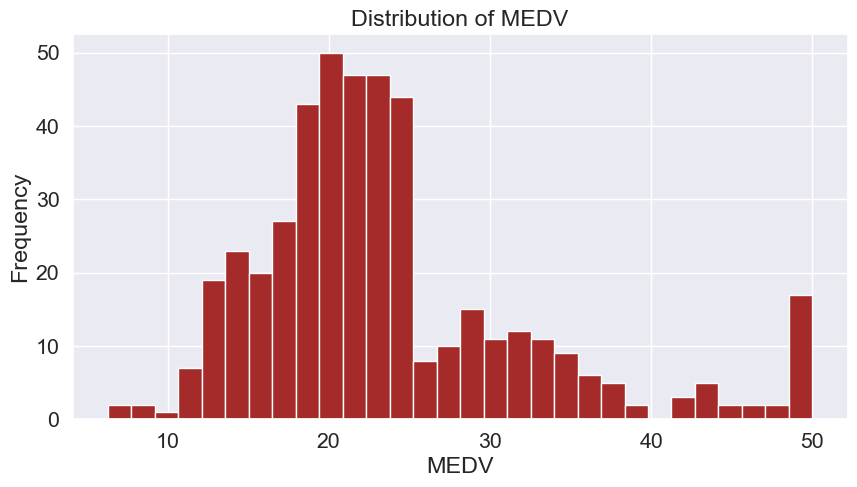

In [204]:
i = 0 
for column in df.columns:
    value_counts = df[column].value_counts()
    if (len(value_counts) < 50):
        plt.figure(figsize=(10, 5)) 
        value_counts.plot(kind='bar',color = colors[i // 2] )
        plt.title(f'Number of observations for each unique value of {column}')
        plt.xlabel('Unique Values')
        plt.ylabel('Number of Observations')
        plt.show()
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(10, 5)) 
        df[column].plot(kind='hist', bins=30,color = colors[i //2 ]) 
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    i += 1 

### Q6. Research other checking methods you can use for the dataset and implement one.
Let’s explore some other data validation and checking methods that you can use for your dataset. Ensuring data quality and accuracy is crucial for reliable analysis. Here are a few techniques and tools you can consider:

1. **Manual Data Validation:** Manually inspect and validate the data by comparing it against predefined rules or criteria.
   
   1. **Advantages:** Simple and straightforward.

        Useful for small datasets.
      
        
   2. **Disadvantages:** Time-consuming for large datasets.
      
        Prone to human error.

2. **Automated Data Validation Tools:** Use specialized tools to automatically validate data based on predefined rules.Examples:
   
   1. **Google Data Validation Tool:**  An open-source tool that checks data quality and consistency.
      
   2. **DataTest:** A Python package for data validation.
      
   3. **Colander:** Another Python package for data validation.
 
   4. **Voluptuous:** A Python library for defining and validating data schemas.

   5. **Arcion:** A cloud service for data validation.
   6. **TravisCI:**  Continuous integration and deployment tools that offer automated data validation.
      
3. **Cross-Validation:** Split your dataset into training and validation sets.

   Use different subsets of the data for training and validation to assess model performance.

   Techniques include k-fold cross-validation, leave-one-out cross-validation, and stratified cross-validatoin
44. **Statistical Checks:** Perform statistical tests to identify outliers, missing values, and inconsistencies.Examples:
   
    1. **Range Check:** Ensure data falls within expected ranges.

    2. **Format Check:** Validate data format (e.g., date formats, phone numbers).

    3. **Consistency Check:** Verify relationships between related data fields.

    4. **Uniqueness Check:** Ensure unique identifiers (e.g., primary key)       s
55. **Machine Learning-Based Checks:** Train a machine learning model to predict missing or incorrect values.
   
    Use imputation techniques or anomaly detection algorithms.didation ensures the reliability of your analyses!the reliability of your analyses!


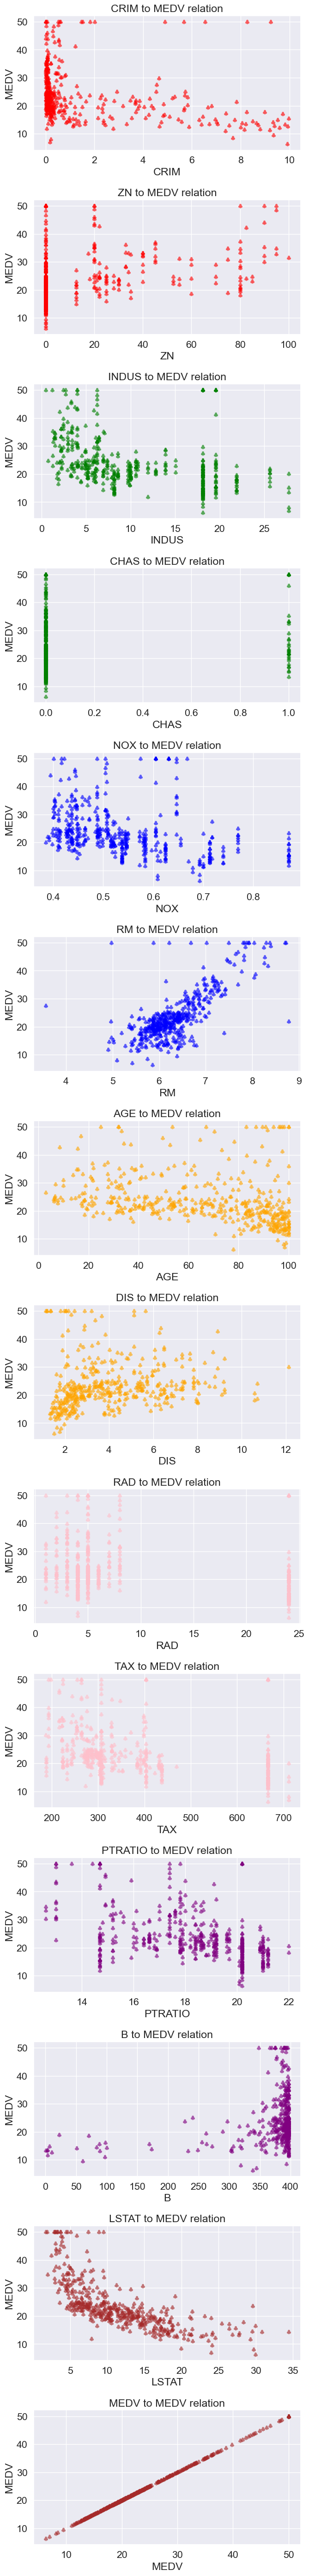

In [205]:
fig, axes = plt.subplots( nrows=len(df.columns), ncols=1, figsize=(7, 4*len(df.columns)))

for i, col in enumerate(df.columns):
    axes[i].scatter( df[col] , df["MEDV"] , c=colors[i//2], alpha=0.5, marker=r'$\clubsuit$',
           label="Luck")
    axes[i].set_title(col + ' to MEDV' + " relation")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MEDV")

plt.tight_layout()
plt.show()

## 2)Preprocessing Data

### Q7. Explain the methods of filling Missing Values  and implement at least three methods. Briefly mention the reason for using each method
Let’s explore some methods for handling missing values in a dataset and implement three of them using Python. Missing data can occur due to various reasons, such as data collection errors, sensor failures, or user omissions. It’s essential to address missing values to ensure accurate and reliable analyses.

Here are three common methods for filling missing values:

1. **Mean/Median/Mode Imputation:** 
   
   1. **Method:** Replace missing values with the mean (for numerical features), median (for skewed distributions), or mode (for categorical features) of the respective column.

   2. **Reason:** This method is straightforward and works well when the missing values are missing at random (MAR). It helps maintain the overall distribution of the feature.

2. **Forward Fill (ffill) and Backward Fill (bfill):**    
   1. **Method:** Forward Fill (ffill): Propagate the last observed non-null value forward to fill missing values.
                  Backward Fill (bfill): Propagate the next non-null value backward to fill missing values.
      
   2. **Reason:** These methods are useful for time-series data, where missing values can be interpolated based on the previous or subsequent values.
      
3. **Interpolation:**
   
   1. **Method:** Use interpolation techniques (such as linear, polynomial, or spline interpolation) to estimate missing values based on neighboring data points.
      
   2. **Reason:** Interpolation provides a more sophisticated way to estimate missing values, especially when the data follows a trend or pattern.



In [206]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7     NaN   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [207]:
# df.ffill(axis = 0)


In [208]:
# df.bfill(axis = 0)

In [209]:
# df["B"].fillna( method ='ffill',limit = 1) #, inplace = True
# df

In [210]:
median = df['B'].median()
mean = df['B'].mean()
std = df['B'].std()
min_ = df["B"].min()
max_ = df["B"].max()

print(f"B Median: {median:.2f}")
print(f"B Mean: {mean:.2f}")
print(f"B Standard Deviation: {std:.2f}")
print(f"B min: {min_:.2f}")
print(f"B max: {max_:.2f}")

B Median: 390.88
B Mean: 336.82
B Standard Deviation: 121.17
B min: 0.32
B max: 396.90


In [211]:
df['B'].fillna(df['B'].median(),inplace =True)

In [212]:
median = df['CHAS'].median()
mean = df['CHAS'].mean()
std = df['CHAS'].std()
min_ = df["CHAS"].min()
max_ = df["CHAS"].max()

print(f"CHAS Median: {median:.2f}")
print(f"CHAS Mean: {mean:.2f}")
print(f"CHAS Standard Deviation: {std:.2f}")
print(f"CHAS min: {min_:.2f}")
print(f"CHAS max: {max_:.2f}")

CHAS Median: 0.00
CHAS Mean: 0.17
CHAS Standard Deviation: 0.38
CHAS min: 0.00
CHAS max: 1.00


In [213]:
df['CHAS'].fillna((df['CHAS'].median()),inplace =True)

In [214]:
median = df['DIS'].median()
mean = df['DIS'].mean()
std = df['DIS'].std()
min_ = df["DIS"].min()
max_ = df["DIS"].max()

print(f"DIS Median: {median:.2f}")
print(f"DIS Mean: {mean:.2f}")
print(f"DIS Standard Deviation: {std:.2f}")
print(f"DIS min: {min_:.2f}")
print(f"DIS max: {max_:.2f}")

DIS Median: 3.92
DIS Mean: 6.21
DIS Standard Deviation: 6.53
DIS min: 1.13
DIS max: 24.00


In [215]:
df['DIS'].fillna((df['DIS'].mean()),inplace =True)

In [216]:
median = df['MEDV'].median()
mean = df['MEDV'].mean()
std = df['MEDV'].std()
min_ = df["MEDV"].min()
max_ = df["MEDV"].max()

print(f"MEDV Median: {median:.2f}")
print(f"MEDV Mean: {mean:.2f}")
print(f"MEDV Standard Deviation: {std:.2f}")
print(f"MEDV min: {min_:.2f}")
print(f"MEDV max: {max_:.2f}")

MEDV Median: 21.95
MEDV Mean: 23.75
MEDV Standard Deviation: 8.81
MEDV min: 6.30
MEDV max: 50.00


In [217]:
df['MEDV'].fillna((df['MEDV'].mean()),inplace =True)

In [218]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Q8. Is it possible to delete some columns? Why? If it is possible, delete the necessary columns by mentioning the reason.

Yes, it is possible to delete or drop columns from a DataFrame, and there are a variety of reasons why you might want to do this:

1. **Irrelevant Data**: The column may not contain information relevant to the problem you are trying to solve or the analysis you are conducting.

2. **Data Leakage**: The column could contain data that would not be available at the time of making predictions (future data), and using this data during training could lead to overfitting.

3. **Redundant Information**: Sometimes different columns can contain overlapping information. To reduce dimensionality and multicollinearity (which can be problematic for certain types of models), you might drop one of the redundant columns.

4. **Noisy Data**: If a column contains too much noise, it might actually decrease the model's performance.

5. **Too Many Missing Values**: If a column contains too many missing values, it might not be practical to impute or fill those missing values, and dropping the column could be a better solution.

6. **Computational Efficiency**: Reducing the number of features can lead to faster computation, which can be important when working with large datasets or complex models.

7. **Improve Model Performance**: Sometimes models perform better with a smaller set of features. Dropping irrelevant or less important features can potentially improve model performance.


Yes, here, as you can see in the correlation chart, for example, there is high relationship between RM,NOX,RAD,DIS so we delete two of them(DIS and NOX).


In [219]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO        B  LSTAT  MEDV  
0       15.3  396.900   4.98  24.0  
1       17.8  396.900   9.14  21.6  
2       17.8  392.830   4.03  34.7  
3       18.7  390.885   2.94  33.4  
4       18.7  396.900   5.33  36.2  
..       ...      ...    ...   ...  
501     21.0  391.990   9.67  22.4  
502     21.0  396.900   9.08  20.6  
503     21.0  396.900   5.64  23.9  
504     21.0  393.450   6.48  22.0  
505     21.0  396.900   7.88  11.9  

[506 rows x 14 columns]

In [220]:
df = df.drop(columns = ["NOX","DIS"])

In [221]:
df

CRIM    ZN  INDUS  CHAS     RM   AGE  RAD    TAX  PTRATIO        B  \
0    0.00632  18.0   2.31   0.0  6.575  65.2    1  296.0     15.3  396.900   
1    0.02731   0.0   7.07   0.0  6.421  78.9    2  242.0     17.8  396.900   
2    0.02729   0.0   7.07   0.0  7.185  61.1    2  242.0     17.8  392.830   
3    0.03237   0.0   2.18   0.0  6.998  45.8    3  222.0     18.7  390.885   
4    0.06905   0.0   2.18   0.0  7.147  54.2    3  222.0     18.7  396.900   
..       ...   ...    ...   ...    ...   ...  ...    ...      ...      ...   
501  0.06263   0.0  11.93   0.0  6.593  69.1    1  273.0     21.0  391.990   
502  0.04527   0.0  11.93   0.0  6.120  76.7    1  273.0     21.0  396.900   
503  0.06076   0.0  11.93   0.0  6.976  91.0    1  273.0     21.0  396.900   
504  0.10959   0.0  11.93   0.0  6.794  89.3    1  273.0     21.0  393.450   
505  0.04741   0.0  11.93   0.0  6.030  80.8    1  273.0     21.0  396.900   

     LSTAT  MEDV  
0     4.98  24.0  
1     9.14  21.6  
2     4.03  34.7  
3     2.94  33.4  
4     5.33  36.2  
..     ...   ...  
501   9.67  22.4  
502   9.08  20.6  
503   5.64  23.9  
504   6.48  22.0  
505   7.88  11.9  

[506 rows x 12 columns]

### Q9. Which features are called numerical and which are called categorical? What is the difference between these two types of features? Identify numerical and categorical characteristics in this data set.
Let’s discuss the difference between numerical and categorical features and identify them in the given dataset.
1. **Numerical Features (Quantitative Data):** Numerical features are expressed as numbers and can be measured or counted.
   
    They represent quantities or amounts.

    Examples of numerical features include: Age ,Height,Income,Temperature,Number of children .
2. **Categorical Features (Qualitative Data):** Categorical features represent categories or labels.
 
    They do not have inherent numerical meaning.
   
    Examples of categorical features include: Gender (male/female) ,Color (red, green, blue) ,Marital status (single, married, divorced)




In [222]:
numerical_features = [ "CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV" ]
categorical_features = ["CHAS" ]

### Q10. What is the purpose of normalizing or standardizing in numerical features? What is the difference between these two methods? Is there a need to do this in this project?
Let’s dive into the purpose of normalizing and standardizing numerical features and explore the differences between these two methods:


1. **Purpose of Normalization and Standardization:** Both normalization and standardization are techniques used to preprocess numerical features before feeding them into machine learning models.
   
   The primary goals are:

   1. **Scaling:** Bring all features to a similar scale to prevent certain features from dominating others during model training.
   
   2. **Stabilizing Algorithms:** Some algorithms (like gradient descent) perform better when features are scaled.

2. **Normalization (Min-Max Scaling):**    
   1. **Method:** Normalize each feature to a specific range (usually [0, 1]).
                  
      
   2. **Purpose:** Useful when features have different ranges and you want them all within a consistent scale.

        Preserves the original distribution of the data.
      
   4. **Example:** Age (range: 0-100) and income (range: $20,000-$200,000) can be normalized to [0, 1].
              
3. **Standardization (Z-Score Scaling)**
   
   1. **Method:** Standardize each feature to have a mean of 0 and a standard deviation of 1.

      
   2. **Purpose:** Useful when features have different units or distributions.

        Centers the data around zero.

        Does not preserve the original distribution.

   3. **Example:**  Standardizing height (in cm) and weight (in kg) to have zero mean and unit variance.

4. **When to Use Each Method:**
    1. **Normalization:** When the feature distribution is not necessarily Gaussian.

         When you want to preserve the original data range.


    2. **Standardization:** When the feature distribution is approximately Gaussian.

        When you want to center the data around zero and have unit variance.
       

In [223]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # df["MEDV"]
# temp = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features, index=df.index) 
# df = pd.concat([temp , df[categorical_features] , df["MEDV"]] , axis = 1 )

### Q11. What kind of preprocess is usefull for categorical features which are usually saved as strings or objects ?
Categorical features, which are typically represented as strings or objects, require preprocessing before they can be effectively used in machine learning models. Let’s explore some common techniques for handling categorical data:


1. **Label Encoding:** In label encoding, each unique category or label is assigned a unique numerical value. For example, if you have a “color” feature with labels “red,” “green,” and “blue,” you could encode them as 0, 1, and 2, respectively..

   This method is suitable for ordinal data (where there is an inherent order among categories), but it may not be ideal for nominal data (where categories lack any intrinsic hierarchy).

   Sklearn provides the LabelEncoder class for this purpose
   


2. **One-Hot Encoding:** One-hot encoding converts categorical data into binary vectors. Each category becomes a separate binary feature, and only one of these features is active (1) for each observation.
                  
      For example, if you have a “fruit” feature with labels “apple,” “banana,” and “orange,” one-hot encoding would create three binary features: “is_apple,” “is_banana,” and “is_orange.”

   This method is commonly used for nominal data.

   Sklearn provides the OneHotEncoder class for one-hot encoding
   
             
3. **Ordinal Encoding** Ordinal encoding is suitable for ordinal data. It assigns numeric values based on the order or ranking of categories.
   
   For instance, if you have an “education level” feature with labels “high school,” “bachelor’s,” and “master’s,” you could encode them as 0, 1, and 2, respectively.


4. **Frequency Encoding:** In frequency encoding, each category is replaced with its frequency (count) in the dataset. This can be useful when certain categories are more common than others.

    For example, if you have a “country” feature, you could encode each country with the number of occurrences in the dataset.
   
5. **Target Encoding:** Target encoding uses the target variable (the variable you want to predict) to encode categorical features.
 
   For each category, the mean (or other aggregation) of the target variable is calculated. This aggregated value replaces the original category label.

   Target encoding can be helpful when there is a relationship between the categorical feature and the target variable.
       

### Q12. Research validation, train, test data and explain common segmentation methods.Then divide your data into these categories.
Let’s dive into the concepts of data segmentation and the common methods for dividing data into different subsets.

**Data segmentation** involves splitting a dataset into multiple subsets for various purposes, such as model training, validation, and testing. Each subset serves a specific role in the machine learning pipeline:

1. **Training Data:** The training dataset is used to train the machine learning model. It contains labeled examples (input features and corresponding target labels).

   The model learns from this data during training to make accurate predictions.

   Typically, the training data constitutes the largest portion of the dataset.
   


2. **Validation Data:** The validation dataset is used to tune hyperparameters and assess the model’s performance during training.
                  
      It helps prevent overfitting by providing an independent set of examples not used for training.

      Commonly, a portion of the training data is set aside for validation.
   
             
3. **Test Data:** The test dataset evaluates the model’s performance after training and hyperparameter tuning.
   
   It provides an unbiased estimate of how well the model generalizes to unseen data.

   The test data should not be used during model development or hyperparameter tuning.

**Common Segmentation Methods:**
Here are some common ways to divide data into these categories:

1. **Hold-Out Method:** Split the dataset into three parts: training, validation, and test sets.For example:
    70% for training   15% for validation                 15% for testing
   
2. **K-Fold Cross-Validation:** Divide the dataset into K equally sized folds (subsets).
 
   Train the model K times, each time using K-1 folds for training and the remaining fold for validation.

   Calculate the average performance across all K iterations.

   Common choices for K: 5 or 10.
3. **Stratified Sampling:** Ensure that each subset (training, validation, test) maintains the same class distribution as the original dataset.

   Useful when dealing with imbalanced classes.
   
4.**Time-Based Splitting:** For time-series data, split based on chronological order.

   Use earlier data for training, intermediate data for validation, and the latest data for testing.

         

In [224]:
X_train, X_test, y_train, y_test = train_test_split(
df.drop(columns=["MEDV"]),  
df['MEDV'],                 
test_size=0.2,            
random_state= 885         
)

### Q13. Research other preprocessing methods.Mention some and use them if needed.
Preprocessing is a crucial step in preparing data for machine learning models. Let’s explore some common preprocessing techniques:
1. **Standardization (Mean Removal and Variance Scaling):**

   1. Standardization ensures that features have zero mean and unit variance. It’s essential for many machine learning algorithms, especially those that assume normally distributed data.
  
   2. The StandardScaler from scikit-learn is a convenient way to perform this operation. It computes the mean and standard deviation on a training set and applies the same transformation to the testing set
   
2. **Data Cleaning::** Detecting and fixing bad or inaccurate observations in your dataset improves data quality. Removing duplicates, handling missing values, and correcting inconsistencies fall under data cleaning.

             
3. **Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) reduce the number of features while preserving most of the information. This helps prevent overfitting and speeds up training.


4. **Feature Engineering:** Create new features based on domain knowledge. For example, combining existing features, creating interaction terms, or extracting relevant information.
   
5. **Handling Large Amounts of Data (Sampling):** When dealing with large datasets, consider sampling techniques (e.g., random sampling) to work with a manageable subset.

6. **Data Transformation:** Convert data to a consistent structure. This includes encoding categorical variables, scaling numerical features, and handling skewed distributions.

## 3) Traning , Evaluation and Adjusment

## Phase one : Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [225]:
def linear_regression(input, output):
    sum_input = np.sum(input)
    sum_output = np.sum(output)
    mult_in_out = np.sum(input * output)
    SSi = np.sum(input ** 2)
    intercept = (mult_in_out - (len(input) * (sum_input / len(input)) * (sum_output / len(output)))) / (SSi - len(input) * ((sum_input / len(input)) ** 2))
    slope = (sum_output / len(output)) - intercept * (sum_input / len(input))
    print ("intercept: " , intercept)
    print ("slope: " , slope)
    return (intercept, slope)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [226]:
def get_regression_predictions(input, intercept, slope):
    predicted_values = [(intercept * x) + slope for x in input]
    return (predicted_values)

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [227]:
def get_root_mean_square_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.subtract(predicted_values, actual_values)
    mean_squared_error = np.mean(np.square(residuals))
    root_mean_square_error = np.sqrt(mean_squared_error)
    return root_mean_square_error

In [228]:
intercept, slope = linear_regression(X_train['LSTAT'], y_train)
y_pred = get_regression_predictions(X_test['LSTAT'], intercept, slope)

intercept:  -0.92191748370245
slope:  34.52255404370124


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [229]:
def get_r2_score(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    mean_actual_values = sum(actual_values) / len(actual_values)
    total_sum_of_squares = sum((y_i - mean_actual_values) ** 2 for y_i in actual_values)
    # print("total_sum_of_squares",total_sum_of_squares)
    residual_sum_of_squares = sum((y_i - y_hat) ** 2 for y_i, y_hat in zip(actual_values, predicted_values))
    # print("residual_sum_of_squares",residual_sum_of_squares)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

CRIM:
intercept:  -0.8457383032245622
slope:  25.004037946678405
R2 score:  0.1802976349077008
RMSE score:  6.754795496976585
-------------------------------------------------------------
ZN:
intercept:  0.11124710845892874
slope:  22.5769882476327
R2 score:  0.2002746298096192
RMSE score:  6.6719771139360695
-------------------------------------------------------------
INDUS:
intercept:  -0.39334589397502623
slope:  27.504068576492276
R2 score:  0.27840451099637464
RMSE score:  6.337690342745086
-------------------------------------------------------------
CHAS:
intercept:  2.0681793801289787
slope:  23.661793686435086
R2 score:  -0.027302605489354814
RMSE score:  7.56194137140654
-------------------------------------------------------------
RM:
intercept:  0.0020154259694475274
slope:  23.983392432358844
R2 score:  -0.03003803409046424
RMSE score:  7.5720023793122975
-------------------------------------------------------------
AGE:
intercept:  -0.04260497445689591
slope:  26.4897691

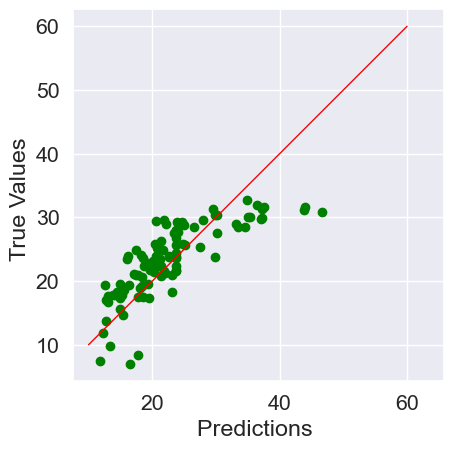

In [230]:
# max_score = 0
# max_i = 0
# max_type = ""
# for i in range (1500,3000):

for feature in X_train.columns:
    print(feature + ":")
    intercept, slope = linear_regression(X_train[feature], y_train)
    y_pred = get_regression_predictions(X_test[feature], intercept, slope)
    # print(f"y_pred: {y_pred:.2f}")
    # print("type_pred",type(y_pred))
    # print("type_test",type(y_test.to_list()))
    # print(f"MEDV max: {max_:.2f}")
    # print("y_test_tolist",y_test.to_list())
    # if (get_r2_score(y_pred, y_test) > max_score):
    #     max_score = get_r2_score(y_pred, y_test)
    #     max_i = i
    #     max_type = feature
    print ("R2 score: " , get_r2_score(y_pred, y_test))
    print ("RMSE score: " , get_root_mean_square_error(y_pred, y_test))
    print ("-------------------------------------------------------------")
X_ref = Y_ref = np.linspace(10, 60, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
g=plt.scatter(y_test.to_list(), y_pred,color= "green")#colors[i//2 - 49
g.axes.set_ylabel('True Values ')
g.axes.set_xlabel('Predictions ')
plt.tight_layout()
g.axes.axis('equal')
g.axes.axis('square')
plt.show() 

# print("max_score,max_i,max_type: ",max_score,max_i,max_type)

### Q14. In this project we are implementing supervised machine learning models. What is the difference between these models and unsupervised, semi-supervised and reinforcement learning models? Give an example for each.

Let’s explore the differences between supervised, unsupervised, semi-supervised, and reinforcement learning models, along with examples for each:


1. **Supervised Learning:**
   
    1. **Definition:** Supervised learning builds a model based on labeled data. In this approach, the algorithm learns from input-output pairs (features and corresponding target labels).

    2. **Input Data:** All data points are labeled (each example has a known target label).
   
    3. **Training Process:** External supervision guides the model during training.

    4. **Use:** Supervised learning is commonly used for tasks like classification (e.g., spam detection, image recognition) and regression (e.g., predicting house prices).

    5. **Example Algorithms:** Decision trees , Support Vector Machine (SVM) ,Linear regression

    6. **Example Use Case:** Image recognition: Identifying objects in images based on labeled training data.
    
2. **Unsupervised Learning:**
    1. **Definition:** Unsupervised learning builds a model based on unlabeled data. The algorithm discovers underlying patterns or structures without explicit target labels.
       
    2. **Input Data:** All data points are unlabelled.
     
    3. **Training Process:** No external supervision; the algorithm explores data relationships independently.
     
    4. **Use:** Unsupervised learning is useful for clustering (grouping similar data points) and dimensionality reduction.
     
    5. **Example Algorithms:** K-means clustering, Hierarchical clustering , Principal Component Analysis (PCA)
     
    6. **Example Use Case:** Customer segmentation: Grouping customers based on purchasing behavior.

        
3. **Semi-Supervised Learning:**
   1. **Definition:** Semi-supervised learning sits between supervised and unsupervised learning. It uses a mix of labeled and unlabeled data for model building.

   2. **Input Data:** Partially labeled (some examples have known labels, while others don’t).
    
   3. **Training Process:** Combines external supervision (from labeled data) and self-discovery (from unlabeled data).
  
   4. **Use:** Semi-supervised learning is helpful when labeled data is scarce but unlabeled data is abundant.
  
   5. **Example Algorithms:** Generative adversarial networks (GANs), Self-trained Naïve Bayes classifier
  
   6. **Example Use Case:** Text document classification: Using a small labeled dataset and a larger unlabeled dataset to improve accuracy.


4. **Reinforcement Learning:**
   1. **Definition:** Reinforcement learning is feedback-based. It trains an algorithm using a system of rewards and punishments for correct and incorrect actions.

    2. **Input Data:** No predefined data; the learning agent interacts with an environment.

    3. **Training Process:** The goal is to maximize rewards by learning optimal actions.
  
    4. **Use Cases:** Playing Games (e.g., Chess): The AI agent learns to make moves that lead to higher rewards.
            Self-Driving Cars: Navigating traffic based on real-time feedback.

    5. **Example Algorithms:** Q-learning, Deep Q Network (DQN), Policy optimization

       

### Q15. What is regression and what are the differences with classification methods?
Let’s dive into regression and classification and explore their differences:
1. **Regression:**
   1. **Definition:** Regression is a type of supervised machine learning algorithm used to predict a continuous numerical value based on input features.
  
   2. **Use Case:** It’s commonly used for tasks like predicting stock prices, estimating house prices, or forecasting sales.
  
   3. **Example:** Suppose we have a dataset with information about houses, including square footage and number of bathrooms. We can build a regression model to predict the selling price of a house based on these features. The response variable (selling price) is continuous.\
  
   4. **Evaluation Metric:** The most common metric for evaluating regression models is the Root Mean Square Error (RMSE), which measures how far predicted values are from observed values.

2. **Classification:**
   
   1. **Definition:** Classification is another type of supervised machine learning algorithm that assigns input data to predefined categories or classes
      
   2. **Use Case:** It’s used for tasks like spam detection (classifying emails as spam or not), medical diagnosis (categorizing diseases), or sentiment analysis (positive/negative sentiment).
      
   3. **Example:** Consider a dataset of college basketball players. We can build a classification model to predict whether a player will be drafted into the NBA based on features like average points per game and division level. The response variable (“drafted” or “not drafted”) is categorical.
      
   4. **Evaluation Metric:** The accuracy of a classification model is typically measured by the percentage of correct classifications it makes.

   
3. **In summary:**

    Regression predicts continuous values.
   
    Classification assigns data to predefined classes. The evaluation metrics differ between the two types of models

### Q16.Briefly explain the relationships presented regarding the linear regression method.

In simple linear regression, we have a model of the form:

$[ f(x) = \alpha x + \beta ]$

Here, $(\alpha)$ represents the slope of the line (how much $( y )$ changes for a change in $( x )$), and $(\beta)$ represents the y-intercept (the value of $( y )$ when $( x = 0 )$).

The goal of linear regression is to find the values of $(\alpha)$ and $(\beta)$ that best fit the data. "Best fit" typically means that the sum of the squared differences between the observed values ($( y_i )$) and the values predicted by our model ($( f(x_i) = \hat{\beta} + \hat{\alpha} x_i )$) is minimized. This sum of squared differences is known as the Residual Sum of Squares (RSS):

$[ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} x_i))^2 ]$

To minimize the RSS, the partial derivatives of RSS with respect to $(\alpha)$ and $(\beta)$ are set to zero. The equations obtained from these steps provide us with the least squares estimates for $(\alpha)$ and $(\beta)$.

**Step 1: Compute RSS of the Training Data**

This equation represents the sum of the squared residuals, which we are trying to minimize through selection of appropriate $(\alpha)$ and $(\beta)$ values.

**Step 2: Compute the Derivatives of the RSS Function in Terms of $(\alpha)$ and $(\beta)$**

Setting each partial derivative equal to zero provides the minimum point of RSS, assuming a convex loss surface.

First equation:

$[ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} x_i) = 0 ]$

By solving this equation, we get the expression for \(\beta\):

$[ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} ]$

Here, $( \hat{x} )$ is the mean of all $( x )$ values and $( \hat{y} )$ is the mean of all $( y )$ values.

Second equation:

$[ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{beta} x_i + 2 \hat{alpha} x_i^2) = 0 ]$

By solving the above with the first equation, we get the expression for $(\alpha)$:

$[ \hat{\alpha} = \frac{\Sigma (x_i - \hat{x})(y_i - \hat{y})}{\Sigma (x_i - \hat{x})^2} ]$

This represents the slope ($(\alpha)$) as the ratio of the covariance of $( x )$ and $( y ) $to the variance of $( x )$, giving the average change in $( y )$ per unit change in $( x )$.

Finally, using $(\alpha)$ from the second equation into the first, we get $(\beta)$:

$[ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} ]$

This $(\beta)$ value ensures that our line passes through the centroid ($( \hat{x}, \hat{y} )$) of the data, providing the best balance between all points.

Essentially, these steps are used to arrive at the least squares estimates for the regression line, which is the line that minimizes the sum of the squared residuals (differences) between the predicted values and the actual values of the target variable.


### Q17. Which feature do you think compared to other features give us a more accurate output? Explain the reason for your choice.
As seen above,the correlation between MEDV and RM is higher than others so it may give us a more accurate output.

### Q18.Read about RSS, MSE, RMSE and 2R score methods and explain each one in your report.
Let’s delve into each of these regression evaluation metrics:
1. **Mean Squared Error (MSE)**:
   - Definition: MSE measures the average squared difference between the estimated values and the actual value. It is a way to quantify the error of a model's predictions.
   - Formula: $[ MSE = \frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 ]$
   - Explanation: For each point, you calculate the square of the difference between the prediction $((\hat{y_i})$) and the actual value $((y_i)$), and then average those values.

2. **Root Mean Squared Error (RMSE)**:
   - Definition: RMSE is the square root of the mean squared error. It measures how well a regression model predicts the outcome of interest.
   - Formula: $[ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2} ]$
   - Explanation: RMSE is simply the square root of MSE and provides error terms in the same units as the response variable, which can be useful for interpretation.

3. **Residual Sum of Squares (RSS)**:
   - Definition: RSS is the sum of the squared differences between the observed dependent variable and the value predicted by the model.
   - Formula: $[ RSS = \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 ]$
   - Explanation: Instead of averaging the square residuals (as in MSE), in RSS, you sum them up. This gives you a total measure of the model's error.

4. **R-squared (R²) Score**:
   - Definition: R² is the proportion of variance in the dependent variable that can be predicted from the independent variable(s). It is a statistic that will give some information about the goodness of fit of a model.
   - Formula: $4[ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\Sigma (y_i - \hat{y_i})^2}{\Sigma (y_i - \bar{y})^2} ]$
   - Explanation: TSS or Total Sum of Squares is the total variance in the response variable. R² compares the fit of the chosen model with that of a horizontal straight line (mean of the observed data). An R² of 1 indicates that the regression predictions perfectly fit the data, while an R² of 0 indicates no linear relationship between the dependent and independent variables.

Each of these metrics provides different information:

- **MSE** and **RMSE** measure the average error magnitude and can be used to compare different models. Since these are both error metrics, lower values imply a better fit.
- **RMSE** is more sensitive to outliers than MSE since the errors are squared before taking the mean, thus highlighting larger errors.
- **RSS** provides a single sum of error magnitude, useful for optimization purposes such as in gradient descent.
- **R²** is a relative measure of fit; it tells us how much of the variability in the response data can be explained by the model. An R² score will normally be between 0 and 1, and a higher score indicates a better fit.

It's worth noting that while a higher R² is generally better, it is not a definitive measure of model quality. For example, a high R² value does not indicate that the model has the correct regression function or that it will make good predictions on new data. Additionally, in models with a large number of predictors, R² will tend to overstate the model's effectiveness because it will always increase as more predictors are added regardless of their relevance. This is why it is sometimes better to look at the adjusted R² which penalizes more complex models, or to use other information criteria like AIC or BIC for model selection.

### Q19. Using the RMSE method and 2R score, evaluate the predicted values.Do the above operations on a few other features as well. What do you infer from the obtained values?
Done above


### Q20. Compare the predicted values ​​with the actual values ​​using a scatter plot, where the x-axis shows the actual values ​​and the y-axis shows the predicted values. Also draw the line y = x.
Done above.

## Phase Three : Classification

### Q21. What is the concept of pruning in decision trees? Mention the advantages and disadvantages of using this method
Let’s explore the concept of pruning in decision trees and discuss its advantages and disadvantages.

**Decision Tree Pruning:** Pruning is a technique used to optimize decision tree models by preventing overfitting and improving their generalization ability. When a decision tree becomes too complex (i.e., too deep or with too many branches), it can fit the training data perfectly but perform poorly on new, unseen data. Pruning helps simplify the tree by removing unnecessary branches or nodes, resulting in a smaller, more interpretable model.

There are two main types of decision tree pruning:
1. **Pre-Pruning (Early Stopping):** Pre-pruning involves stopping the growth of the decision tree before it becomes too complex.

    Common pre-pruning techniques include:
   
    1. **Maximum Depth:** Limiting the maximum depth (number of levels) of the tree.
   
    2. **Minimum Samples:** per Leaf: Setting a minimum threshold for the number of samples in each leaf node.
   
    3. **Minimum Samples:** per Split: Specifying the minimal number of samples needed to split a node.
   
    4. **Maximum Features:** Restricting the features considered for splitting.
   
    By pruning early, we obtain a simpler tree that is less likely to overfit the training data.
   
3. **Post-Pruning (Reducing Nodes):** Post-pruning occurs after the tree is fully grown.

    Common post-pruning techniques include:

    1. **Cost-Complexity Pruning (CCP):** Assigning a cost to each subtree based on accuracy and complexity, then selecting the subtree with the lowest cost.
  
    2. **Reduced Error Pruning:** Removing branches that do not significantly affect overall accuracy
  
    3. **Minimum Impurity Decrease:** Pruning nodes if the decrease in impurity (e.g., Gini impurity or entropy) is below a certain threshold.
  
    4. **Minimum Leaf Size:** Removing leaf nodes with fewer samples than a specified threshold.
       
    Post-pruning simplifies the tree while preserving its accuracy.

4. **Advantages of Decision Tree Pruning:**
   1. **Reduced Overfitting:** Pruning prevents decision trees from becoming overly complex, reducing the risk of overfitting the training data.

   2. **Improved Generalization:** A pruned tree generalizes better to unseen data, making it more reliable for predictions.
  
   3. **Interpretability:** Smaller trees are easier to interpret and explain to stakeholders.
5. **Disadvantages of Decision Tree Pruning:**
    1. **Loss of Information:** Pruning may remove relevant features or patterns from the tree, leading to some loss of predictive power.
       
    2. **Tuning Complexity:** Selecting optimal pruning parameters (e.g., minimum samples per leaf) requires tuning and experimentation.
  
    3. **Trade-Offs:** Pruning involves a trade-off between model simplicity and accuracy.
       
In summary, decision tree pruning helps improve performance, interpretability, and generalization by simplifying the tree structure. Proper pruning leads to more robust models that strike a balance between complexity and accuracy

### Q22. When can the use of decision trees have an advantage over other models?
Decision trees have several advantages over other models in specific scenarios. Let’s explore when decision trees can be advantageous:

1. **Interpretability:**
   
   1. Decision trees are highly interpretable. The structure of a decision tree is easy to visualize and understand.
      
   2. When you need a model that provides clear insights into feature importance and decision-making, decision trees are a great choice.
      
2. **Nonlinear Relationships:**
   
   1. Decision trees can capture nonlinear relationships between features and the target variable.
   2. When your data exhibits complex interactions or nonlinear patterns, decision trees can outperform linear models.
3. **Mixed Data Types:**

   1. Decision trees handle both categorical and numerical features naturally.
   2. When your dataset contains a mix of feature types (e.g., text, numeric, categorical), decision trees simplify feature engineering.
  
4. **Robustness to Outliers:**

   1. Decision trees are less sensitive to outliers compared to linear regression.
   2. When your data contains extreme values, decision trees can provide more robust predictions.
5. **Handling Missing Values:**

   1. Decision trees can handle missing values by splitting nodes based on available features.
   2. When dealing with datasets with missing data, decision trees offer flexibility.\
  
6. **Ensemble Methods:**

   1. Decision trees serve as building blocks for ensemble methods like Random Forests and Gradient Boosting.
   2. When you want to improve model performance by combining multiple decision trees, ensemble methods are powerful.
7. **Feature Interaction Detection:**

   1. Decision trees naturally identify feature interactions.
   2. When you suspect that interactions between features significantly impact the target variable, decision trees can reveal these relationships.
  
However, it’s essential to consider the limitations of decision trees:
1. **Overfitting:** Decision trees can overfit the training data if not pruned properly. Techniques like pre-pruning and post-pruning are crucial to prevent overfitting.

2. **Bias:** Decision trees can be biased toward features with more levels or higher cardinality.

3. **Instability:** Small changes in the data can lead to different tree structures, making decision trees less stable.

   In summary, use decision trees when interpretability, nonlinear relationships, mixed data types, and robustness to outliers are essential.

### Q23. What is the inherent difference between KNN classification and other classification methods such as neural networks or Logistic regression? (Pay attention to how each classifier is trained.)

Let’s explore the inherent differences between K-Nearest Neighbors (KNN), Logistic Regression, and Neural Networks in terms of training and their underlying principles:

1. **K-Nearest Neighbors (KNN):**
   1. **Training Approach:**
      KNN is a non-parametric algorithm, meaning it doesn’t make any assumptions about the underlying data distribution. It memorizes the entire training dataset.

   2. **Instance-Based Learning:**
      KNN operates based on the principle of feature similarity. When a new data point is introduced, it looks at the ‘k’ closest data points (neighbors) in the training set. The algorithm calculates the distance between data points (using metrics like Euclidean or Manhattan distance) and assigns the new point to the most common class among these neighbors (for classification) or predicts a value based on the average of its nearest neighbors (for regression).
  
   3. **Advantages:**
      1. Simple and versatile.
     
      2. Effective in capturing non-linear relationships.
        
      3. No explicit model training.
         
    4. **Disadvantages:**
  
       1. Computationally expensive for large datasets.
      
       2. Sensitive to noise and outliers.

       3. Choice of ‘k’ impacts performance.
      
2. **Logistic Regression:**

   1. **Training Approach:** Logistic Regression is a parametric algorithm. It assumes a specific functional form (the logistic function) for the relationship between input features and the output (probability of occurrence of an event).
  
   2. **Probability Modeling:** Logistic Regression transforms linear combinations of input features into a probability format ranging between 0 and 1. It predicts the probability of belonging to a specific class (binary or multinomial).
  
   3. **Advantages:**
  
       1. Efficient and interpretable.
     
       2. Suitable for linear or logistic relationships.

       3. Provides probabilities.
     
    4. **Disadvantages:**
       1. Assumes linearity (may not capture complex non-linear patterns).
      
       2. Sensitive to outliers.
      
       3. Limited expressiveness compared to neural networks.

3. **Neural Networks (NNs):**

    1. **Training Approach:** Neural networks are a class of deep learning models. They consist of interconnected layers of artificial neurons (nodes). Training involves adjusting the weights (parameters) of these connections using optimization techniques (e.g., gradient descent).
       
    2. **Complexity and Flexibility:** NNs can model highly complex relationships, including non-linear ones. They learn hierarchical features from raw data.
  
    3. **Advantages:**
       
       1. High expressiveness due to hidden layers.
      
       2. Can approximate any function (universal approximation theorem).

       3. Suitable for large-scale problems.

    5. **Disadvantages:**

       1. Requires large amounts of data for training.

       2. Prone to overfitting (regularization techniques needed).

       3. Black-box nature (less interpretable).
            
In summary:

**KNN** is chosen for simplicity and effectiveness in capturing non-linear relationships.

**Logistic Regression** is preferred for efficiency and interpretability, especially when the relationship between predictors and the response is linear or logistic.

**Neural Networks** excel in modeling complex relationships but require substantial data and come with interpretability challenges

### Q24. Research the one nearest neighbor algorithm and mention its advantages and disadvantages
Let’s explore the **One Nearest Neighbor (1-NN) algorithm** and discuss its advantages and disadvantages:

**One Nearest Neighbor (1-NN) Algorithm**
The 1-NN algorithm is a variant of the K-Nearest Neighbors (KNN) algorithm, where K is set to 1. In other words, it considers only the single nearest neighbor to a given data point when making predictions. Here are the key points about 1-NN:

1. **Working Principle:**

   1. Given a dataset with labeled instances (training data), the 1-NN algorithm identifies the closest data point (neighbor) to a new, unclassified data point.
  
   2. The class or value of the new point is determined by the class or value of its nearest neighbor.

2. **Advantages of 1-NN:**

   1. **Robust to Noisy Data:**

      1. 1-NN is robust to noisy training data, especially if we use an inverse square of weighted distance as the distance metric1.
     
      2. It relies on the closest neighbor, which tends to be less affected by outliers.

   2. **Effective for Large Training Sets:**
  
      1. Despite its simplicity, 1-NN can handle large training datasets effectively.

      2. It doesn’t require extensive model training or parameter tuning.

3. **Disadvantages of 1-NN:** 

   1. **Computational Cost:** 

      1. Determining the nearest neighbor for each query point can be computationally expensive, especially when dealing with large datasets.

      2. The algorithm needs to calculate distances between the query point and all training points.

   2. **Memory Requirements:**

      1. Processing large datasets requires substantial memory, as the algorithm must store the entire training dataset.

   3. **Choosing the Right Value of K:**

      1. In 1-NN, there’s no parameter (K) to tune (since (K = 1)), but choosing the right distance metric (e.g., Euclidean distance) is crucial.

      2. However, in more general KNN (where (K > 1)), selecting an appropriate (K) value becomes important.
     

In summary, the 1-NN algorithm is simple, robust, and useful for specific scenarios. However, its computational cost and memory requirements can be limiting factors, especially when working with large datasets

### Q25. Research about other methods of distance measurement in KNN algorithm and describe some of them
Let’s explore different distance measurement techniques commonly used in the K-Nearest Neighbors (KNN) algorithm. These techniques play a crucial role in determining the proximity of data points. Here are some of the commonly used distance metrics:

1. **Euclidean Distance:**

   1. The Euclidean distance is the most widely used metric in KNN.
   2. It measures the straight-line distance between two points in Euclidean space (like measuring the length of a rope).

   3. For two vectors \(X\) and \(Y\)  the Euclidean distance is calculated as: sqrt (sum ((X_i - Y_i)^2)).
    
   4. Euclidean distance works well when features have similar scales.
2. **Manhattan Distance (Taxicab Distance):**

   1. The Manhattan distance (also known as the taxicab distance) measures the distance along the grid lines (like moving through city blocks).
  
   2. It is calculated as the sum of absolute differences between corresponding coordinates: **Manhattan Distance** = | x 1 − x 2 | + | y 1 − y 2 | . An analogous relationship can be defined in a higher-dimensional space.
  
   3. Manhattan distance is robust to outliers and works well when features have different scales.
3. **Minkowski Distance:**
   1. The Minkowski distance generalizes both Euclidean and Manhattan distances.
   2. It is defined as: Let us consider a 2-dimensional space having three points P1 (X1, Y1), P2 (X2, Y2), and P3 (X3, Y3), the Minkowski distance is given by ( |X1 – Y1|^p + |X2 – Y2|^p + |X2 – Y2|^p )^(1/p)
   3. When \(p = 2\), it reduces to Euclidean distance, and when \(p = 1\), it becomes Manhattan distance.
  
   4. The choice of \(p\) determines the sensitivity to different feature dimensions.
4. **Hamming Distance:**

   1. The Hamming distance is used for categorical data (e.g., binary features or nominal attributes).
   2. It counts the number of positions at which corresponding elements are different.
  
   3. For binary vectors, it’s simply the number of differing bits.
   4. For example, if \(X = (0, 1, 1, 0)\) and \(Y = (1, 1, 0, 1)\), the Hamming distance is 3 (three differing positions).
  
These distance metrics help KNN determine the similarity or dissimilarity between data points. Depending on the nature of your data (continuous, categorical, or mixed), you can choose an appropriate distance measure











### Q26. Show one of the optimized models that you achieved by trial and error in your report.


In [231]:
a = pd.qcut(df['MEDV'], q = 10, labels = False)
df = df.assign(LUXURIOS=a)

In [232]:
df

CRIM    ZN  INDUS  CHAS     RM   AGE  RAD    TAX  PTRATIO        B  \
0    0.00632  18.0   2.31   0.0  6.575  65.2    1  296.0     15.3  396.900   
1    0.02731   0.0   7.07   0.0  6.421  78.9    2  242.0     17.8  396.900   
2    0.02729   0.0   7.07   0.0  7.185  61.1    2  242.0     17.8  392.830   
3    0.03237   0.0   2.18   0.0  6.998  45.8    3  222.0     18.7  390.885   
4    0.06905   0.0   2.18   0.0  7.147  54.2    3  222.0     18.7  396.900   
..       ...   ...    ...   ...    ...   ...  ...    ...      ...      ...   
501  0.06263   0.0  11.93   0.0  6.593  69.1    1  273.0     21.0  391.990   
502  0.04527   0.0  11.93   0.0  6.120  76.7    1  273.0     21.0  396.900   
503  0.06076   0.0  11.93   0.0  6.976  91.0    1  273.0     21.0  396.900   
504  0.10959   0.0  11.93   0.0  6.794  89.3    1  273.0     21.0  393.450   
505  0.04741   0.0  11.93   0.0  6.030  80.8    1  273.0     21.0  396.900   

     LSTAT  MEDV  LUXURIOS  
0     4.98  24.0         6  
1     9.14  21.6         4  
2     4.03  34.7         8  
3     2.94  33.4         8  
4     5.33  36.2         9  
..     ...   ...       ...  
501   9.67  22.4         4  
502   9.08  20.6         3  
503   5.64  23.9         6  
504   6.48  22.0         4  
505   7.88  11.9         0  

[506 rows x 13 columns]

In [233]:
df.loc[df['LUXURIOS'] > 7 ,'LUXURIOS'] = 30
df.loc[df["LUXURIOS"] < 2 ,"LUXURIOS"] =  20
df.loc[df['LUXURIOS'] <= 7  ,'LUXURIOS'] = 25

In [234]:
df.loc[df['LUXURIOS'] == 30 ,'LUXURIOS'] = '20'
df.loc[df["LUXURIOS"] == 20 ,"LUXURIOS"] =  '0'
df.loc[df['LUXURIOS'] == 25  ,'LUXURIOS'] = '10'

In [235]:
df

CRIM    ZN  INDUS  CHAS     RM   AGE  RAD    TAX  PTRATIO        B  \
0    0.00632  18.0   2.31   0.0  6.575  65.2    1  296.0     15.3  396.900   
1    0.02731   0.0   7.07   0.0  6.421  78.9    2  242.0     17.8  396.900   
2    0.02729   0.0   7.07   0.0  7.185  61.1    2  242.0     17.8  392.830   
3    0.03237   0.0   2.18   0.0  6.998  45.8    3  222.0     18.7  390.885   
4    0.06905   0.0   2.18   0.0  7.147  54.2    3  222.0     18.7  396.900   
..       ...   ...    ...   ...    ...   ...  ...    ...      ...      ...   
501  0.06263   0.0  11.93   0.0  6.593  69.1    1  273.0     21.0  391.990   
502  0.04527   0.0  11.93   0.0  6.120  76.7    1  273.0     21.0  396.900   
503  0.06076   0.0  11.93   0.0  6.976  91.0    1  273.0     21.0  396.900   
504  0.10959   0.0  11.93   0.0  6.794  89.3    1  273.0     21.0  393.450   
505  0.04741   0.0  11.93   0.0  6.030  80.8    1  273.0     21.0  396.900   

     LSTAT  MEDV LUXURIOS  
0     4.98  24.0       10  
1     9.14  21.6       10  
2     4.03  34.7       20  
3     2.94  33.4       20  
4     5.33  36.2       20  
..     ...   ...      ...  
501   9.67  22.4       10  
502   9.08  20.6       10  
503   5.64  23.9       10  
504   6.48  22.0       10  
505   7.88  11.9        0  

[506 rows x 13 columns]

In [236]:
def make_confusion_matrix(real_labels , pred_labels):
    cm = confusion_matrix(real_labels, pred_labels)
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap = "RdYlGn", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm

In [237]:
df.drop(columns=["ZN","LUXURIOS","RAD"])

CRIM  INDUS  CHAS     RM   AGE    TAX  PTRATIO        B  LSTAT  MEDV
0    0.00632   2.31   0.0  6.575  65.2  296.0     15.3  396.900   4.98  24.0
1    0.02731   7.07   0.0  6.421  78.9  242.0     17.8  396.900   9.14  21.6
2    0.02729   7.07   0.0  7.185  61.1  242.0     17.8  392.830   4.03  34.7
3    0.03237   2.18   0.0  6.998  45.8  222.0     18.7  390.885   2.94  33.4
4    0.06905   2.18   0.0  7.147  54.2  222.0     18.7  396.900   5.33  36.2
..       ...    ...   ...    ...   ...    ...      ...      ...    ...   ...
501  0.06263  11.93   0.0  6.593  69.1  273.0     21.0  391.990   9.67  22.4
502  0.04527  11.93   0.0  6.120  76.7  273.0     21.0  396.900   9.08  20.6
503  0.06076  11.93   0.0  6.976  91.0  273.0     21.0  396.900   5.64  23.9
504  0.10959  11.93   0.0  6.794  89.3  273.0     21.0  393.450   6.48  22.0
505  0.04741  11.93   0.0  6.030  80.8  273.0     21.0  396.900   7.88  11.9

[506 rows x 10 columns]

In [238]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["LUXURIOS","CHAS"]),  
    df['LUXURIOS'],                 
    test_size=0.2,              
    random_state=84              
)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

#### decisionTree

In [239]:
decisionTree = DecisionTreeClassifier(
    criterion='entropy', 
    #splitter='random',   
    max_depth=3,        
    min_samples_split=4, 
    min_samples_leaf=4  
    # random_state=42       
)
decisionTree.fit(X_train, y_train_encoded)
preds_DT = decisionTree.predict(X_test)

In [240]:
(label_encoder.fit_transform(y_test))

array([1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2])

In [241]:
preds_DT

array([1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2])

In [242]:
model = RandomForestClassifier()
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = df.drop('LUXURIOS', axis=1)
y = df['LUXURIOS']
scores = cross_val_score(model, X, y, cv=kf)

print(scores)
print(scores.mean())

[0.99019608 1.         1.         1.         1.        ]
0.9980392156862745


#### LinearRegression

In [243]:
model = LinearRegression()
kf = KFold(n_splits=6, random_state=42, shuffle=True)
X = df.drop('RM', axis=1)
y = df['RM']
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(rmse_scores)
print(rmse_scores.mean())

[1.62702058 3.78970351 1.71140846 2.07788204 5.77197843 2.8576319 ]
2.972604152853512


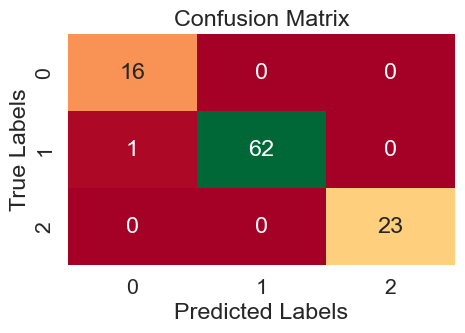

In [244]:
cm_DT = make_confusion_matrix(label_encoder.fit_transform(y_test) , preds_DT)

In [245]:
def scoring(cm):
    col_sum = [cm[0][i] + cm[1][i]  for i in range(2)]
    precision = [cm[i][i]/sum(cm[i]) for i in range(0,2)]
    recalls = [cm[i][i] / col_sum[i] for i in range(2)]
    F1_score = [(2*precision[i]*recalls[i])/ (precision[i] + recalls[i]) for i in range(2)]
    accuracy = sum(cm[i][i] for i in range(2))/sum(sum(cm))
    plt.clf()
    plt.figure(figsize=(5, 3))
    plt.scatter([0,1], precision)
    plt.scatter([0,1], recalls)
    plt.scatter([0,1], F1_score)
    plt.grid()
    plt.xlabel("class")
    plt.ylabel("metric")
    blue_patch = mpatches.Patch(color='blue',label='precision')
    orange_patch = mpatches.Patch(color='orange',label='F1_score')
    green_patch = mpatches.Patch(color='green',label='recalls')
    plt.legend(handles=[blue_patch,orange_patch,green_patch])
    for i in range(2):
        plt.text(i, precision[i], f'{precision[i]:.2f}', ha='center', va='bottom')
        plt.text(i, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
        plt.text(i, F1_score[i], f'{F1_score[i]:.2f}', ha='center', va='bottom')
    plt.xticks([0, 1])
    plt.show()

    print(f"Precision: {precision[0]:.2f}")
    print(f"Recall: {recalls[0]:.2f}")
    print(f"F1 Score: {F1_score[0]:.2f}")
    print()

    weighted_average = sum(F1_score)/2
    micro_average = (sum(cm[i][i] for i in range(2)) / sum(sum(cm))) + (sum(cm[i][i] for i in range(2)) / sum(sum(cm))) / 2 
    macro_average = sum(F1_score)/2
    print("micro average: " + str(micro_average))
    print("weighted_average: " + str(weighted_average))
    print("macro average: " + str(macro_average))
    print("accuract: " + str(accuracy))

<Figure size 640x480 with 0 Axes>

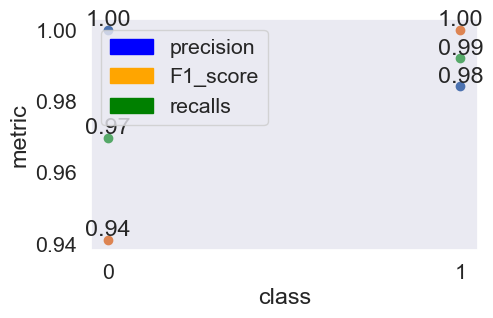

Precision: 1.00
Recall: 0.94
F1 Score: 0.97

micro average: 1.1470588235294117
weighted_average: 0.9808484848484849
macro average: 0.9808484848484849
accuract: 0.7647058823529411


In [246]:
scoring(cm_DT)

#### KNN

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , metric = "manhattan" , weights = "distance")
knn.fit(X_train.to_numpy(), y_train_encoded)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [248]:
KNN_preds = knn.predict(X_test.to_numpy())

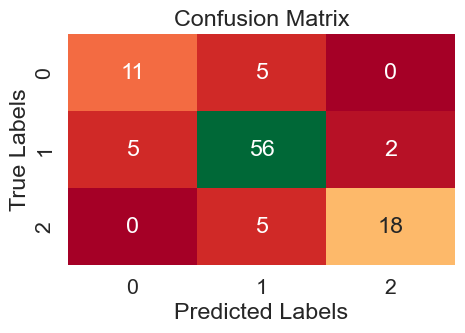

In [249]:
cm_KNN = make_confusion_matrix(label_encoder.fit_transform(y_test) , KNN_preds)

<Figure size 640x480 with 0 Axes>

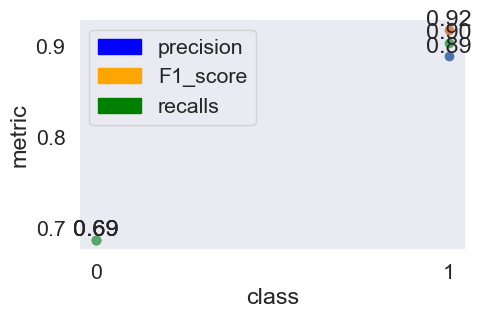

Precision: 0.69
Recall: 0.69
F1 Score: 0.69

micro average: 0.9852941176470589
weighted_average: 0.7953629032258064
macro average: 0.7953629032258064
accuract: 0.6568627450980392


In [250]:
scoring(cm_KNN)

#### logistioc_regression

In [251]:
log_reg = LogisticRegression(
    penalty='l2',  
    C=1.0,  
    solver='lbfgs',  
    max_iter=100, 
    multi_class='auto', 
    class_weight='balanced',  
)
log_reg.fit(X_train, y_train_encoded)

LogisticRegression(class_weight='balanced')

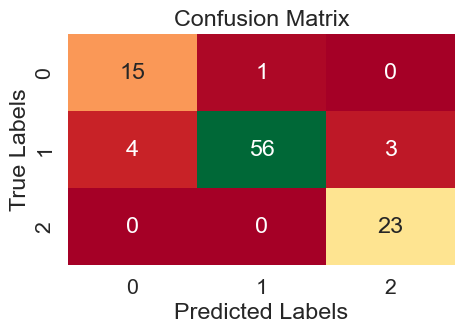

<Figure size 640x480 with 0 Axes>

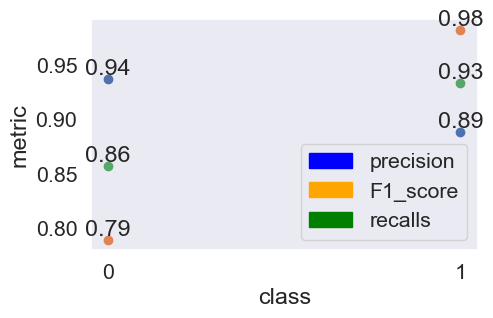

Precision: 0.94
Recall: 0.79
F1 Score: 0.86

micro average: 1.0441176470588234
weighted_average: 0.8952380952380953
macro average: 0.8952380952380953
accuract: 0.696078431372549


In [252]:
Log_preds = log_reg.predict(X_test)
Log_cm = make_confusion_matrix(label_encoder.fit_transform(y_test) , Log_preds)
scoring(Log_cm)

In [253]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'C': np.logspace(-4, 4, 20),  
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  
    'max_iter': [50, 100, 200],  
    'class_weight': [None, 'balanced'],  
    'l1_ratio': np.linspace(0, 1, 10)
}
logreg_cv = GridSearchCV( LogisticRegression(), param_grid, cv=5, verbose=1, n_jobs=-1)  # Using all CPU cores with n_jobs=-1
logreg_cv.fit(X_train, y_train_encoded) 
print("Best parameters found: ", logreg_cv.best_params_)

Fitting 5 folds for each of 24000 candidates, totalling 120000 fits
Best parameters found:  {'C': 0.615848211066026, 'class_weight': None, 'l1_ratio': 0.0, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


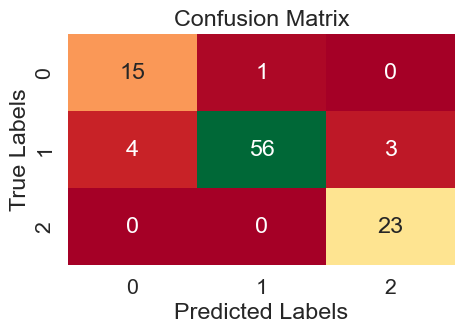

<Figure size 640x480 with 0 Axes>

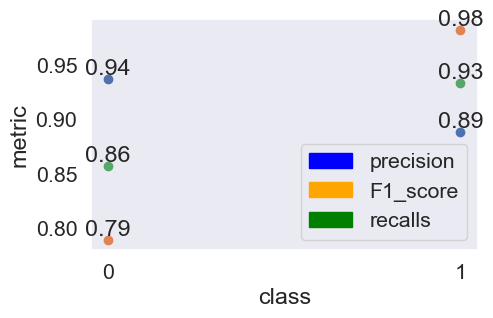

Precision: 0.94
Recall: 0.79
F1 Score: 0.86

micro average: 1.0441176470588234
weighted_average: 0.8952380952380953
macro average: 0.8952380952380953
accuract: 0.696078431372549


In [254]:
Log_preds_cv = log_reg.predict(X_test)
Log_cm_cv = make_confusion_matrix(label_encoder.fit_transform(y_test) , Log_preds_cv)
scoring(Log_cm_cv)

### Q27.For both of these models, obtain the optimal values ​​for the parameters with the help of function  GridSearchCV . Briefly explain how this function works. and compare the obtained results with the results obtained from the models whose parameters were obtained by trial and error.
GridSearchCV is a powerful tool for hyperparameter tuning in machine learning. Let me explain how it works:

1. **What is GridSearchCV?**

   1. GridSearchCV automates the process of hyperparameter tuning by exhaustively searching through a predefined grid of parameter combinations.
  
   2. It evaluates each combination using cross-validation (usually K-fold cross-validation) and provides us with the best set of parameters that maximize the model’s performance.
  
2. **How does GridSearchCV work?**

   1. We pass predefined values for hyperparameters to the GridSearchCV function.
   2. These hyperparameters are specified in a dictionary (or grid) where each hyperparameter is associated with a list of possible values.
   3. GridSearchCV tries all combinations of the values in the grid and evaluates the model for each combination using cross-validation.
  
   4. After evaluating all combinations, it selects the hyperparameters that result in the best performance (e.g., highest accuracy or lowest loss).
  
3. **Arguments of GridSearchCV:**

   1. **estimator:** The machine learning model (estimator) for which we want to find the best hyperparameters.
   2. **param_grid:** The dictionary specifying the hyperparameters and their possible values.
  
   3. **scoring:** The evaluation metric (e.g., accuracy, F1-score) to optimize.
  
   4. **cv:** The cross-validation strategy (e.g., K-fold cross-validation).
  
   5. **n_jobs:** The number of CPU cores to use for parallel computation (optional).

In summary, GridSearchCV helps us systematically explore hyperparameter space and find the optimal combination of hyperparameters for our model.

#### DecisionTreeGrid

In [255]:
DecisionTreeGridSearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 20),
        "min_samples_split": range(2, 20),
        "min_samples_leaf": range(2, 20),
        "random_state": [84],
    },
    scoring="accuracy",
    cv= 4,
    n_jobs=-1,
)

DecisionTreeGridSearch.fit(X_train, y_train_encoded)
print(f"Best Parameters are : {DecisionTreeGridSearch.best_params_}")

Best Parameters are : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 84, 'splitter': 'best'}


In [256]:
preds_DT_Grid = DecisionTreeGridSearch.predict(X_test)

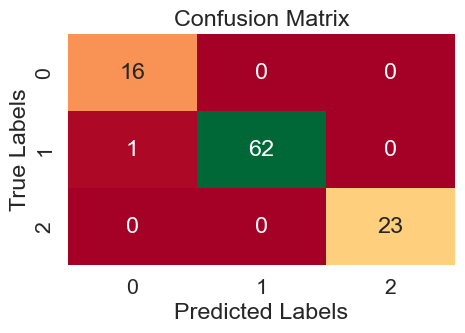

In [257]:
cm_DT_Grid = make_confusion_matrix(label_encoder.fit_transform(y_test) , preds_DT_Grid)

<Figure size 640x480 with 0 Axes>

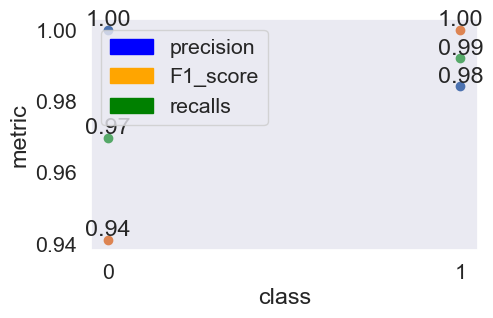

Precision: 1.00
Recall: 0.94
F1 Score: 0.97

micro average: 1.1470588235294117
weighted_average: 0.9808484848484849
macro average: 0.9808484848484849
accuract: 0.7647058823529411


In [258]:
scoring(cm_DT_Grid)

#### KNN grid

In [259]:
warnings.filterwarnings("ignore")
knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid = {
    'n_neighbors': range(2, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    },
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
knn_grid.fit(X_train.to_numpy(), y_train_encoded)
print(f"Best Parameters : {knn_grid.best_params_}")

Best Parameters : {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


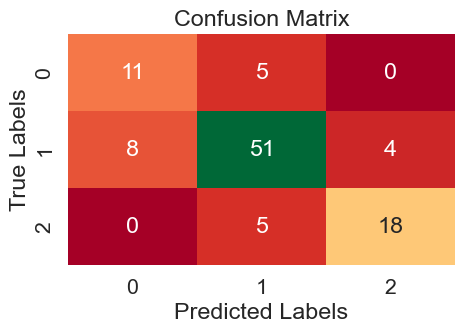

<Figure size 640x480 with 0 Axes>

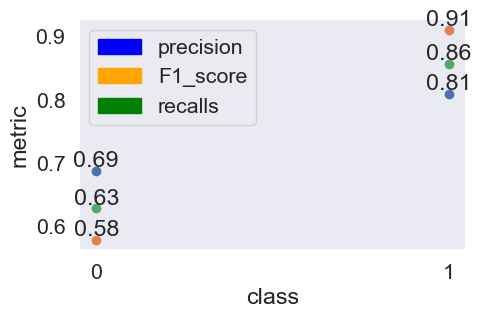

Precision: 0.69
Recall: 0.58
F1 Score: 0.63

micro average: 0.9117647058823528
weighted_average: 0.7428571428571429
macro average: 0.7428571428571429
accuract: 0.6078431372549019


In [260]:
KNN_grid_preds = knn_grid.predict(X_test.to_numpy())
cm_KNN_grid = make_confusion_matrix(label_encoder.fit_transform(y_test) , KNN_grid_preds)
scoring(cm_KNN_grid)

In [261]:
print(f"Decision Tree Accuracy for train data: {decisionTree.score(X_train, y_train_encoded) * 100:5.2f}%")
print(f"Decision Tree Accuracy for test data: {decisionTree.score(X_test, label_encoder.fit_transform(y_test)) * 100:5.2f}%")
print("------------------------------------------------------------------------------------------")
print(f"KNN Accuracy for train data: {knn.score(X_train.to_numpy(), y_train_encoded) * 100:5.2f}%")
print(f"KNN Accuracy for test data: {knn.score(X_test.to_numpy(), label_encoder.fit_transform(y_test)) * 100:5.2f}%")
print("------------------------------------------------------------------------------------------")
print(f"Logistic Regression Accuracy for train data: {log_reg.score(X_train, y_train_encoded) * 100:5.2f}%")
print(f"Logistic Regression Accuracy for test data: {log_reg.score(X_test, label_encoder.fit_transform(y_test) ) * 100:5.2f}%")

Decision Tree Accuracy for train data: 100.00%
Decision Tree Accuracy for test data: 99.02%
------------------------------------------------------------------------------------------
KNN Accuracy for train data: 100.00%
KNN Accuracy for test data: 83.33%
------------------------------------------------------------------------------------------
Logistic Regression Accuracy for train data: 92.08%
Logistic Regression Accuracy for test data: 92.16%


### Q28.Plot the final decision tree.

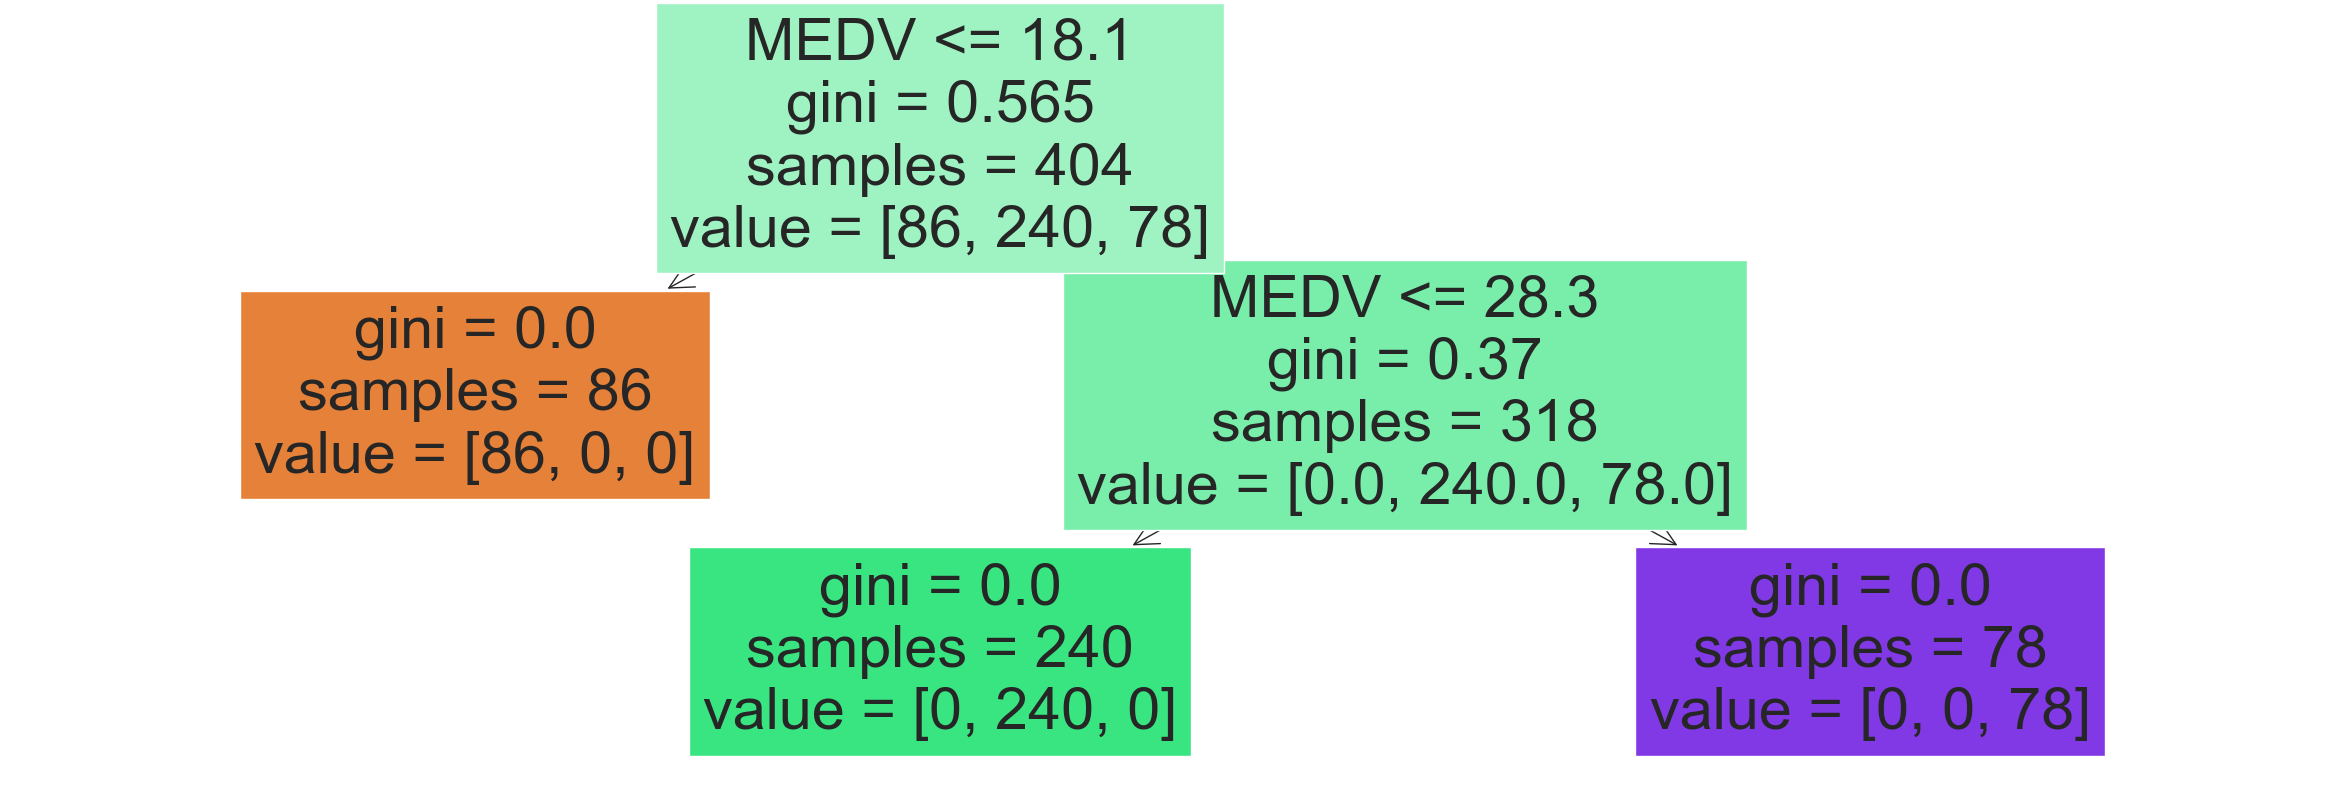

In [262]:
plt.figure(figsize=(30, 10))
plot_tree(
    DecisionTreeGridSearch.best_estimator_,
    filled=True,
    feature_names = X_train.columns.tolist(),
)
plt.show()

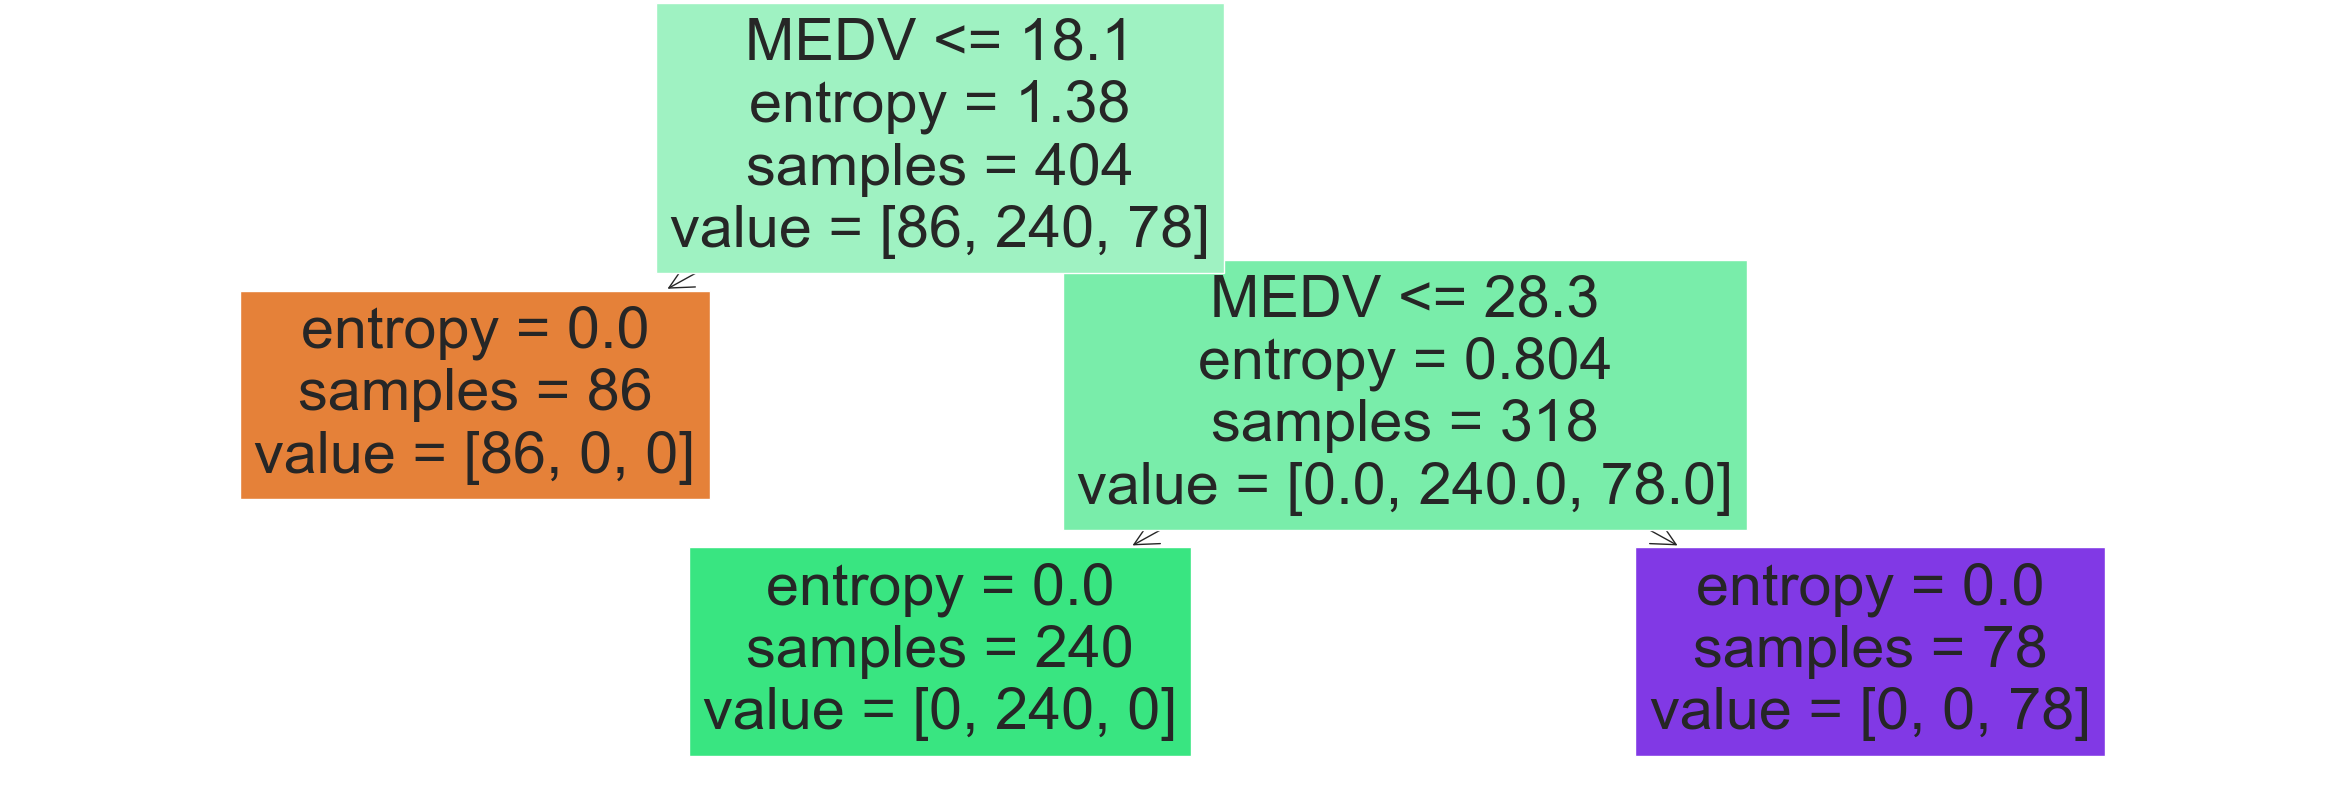

In [263]:
plt.figure(figsize=(30, 10))
plot_tree(
    decisionTree,
    filled=True,
    feature_names = X_train.columns.tolist(),
)
plt.show()

### Q29. Has underfitting or overfitting occurred in your models? In general, when does these phenomenons occur? Explain each one.
Let’s discuss underfitting and overfitting in the context of machine learning models:

1. **Underfitting**

   1. **Definition:** Underfitting occurs when a model is too simple to capture the underlying patterns in the training data.
  
   2. **Characteristics:**
      1. The model performs poorly on both the training data and unseen test data.

      2. It fails to learn the complexities of the data, resulting in high bias.
     
      3. The training error and test error are both high.

   3. **Causes:**
      
      1. Using a linear model for highly non-linear data.
     
      2. Insufficient model complexity (e.g., using a low-degree polynomial for a complex relationship).

      3. Too few features or too little training data.

   4. **Solution:**
  
      1. Increase model complexity (e.g., use a more flexible model).
     
      2. Add relevant features.

      3. Gather more training data.

2. **Overfitting:**

   1. **Definition:** Overfitting occurs when a model is too complex and fits the training data too closely, capturing noise and random fluctuations.
  
   2. **Characteristics:**
      
      1. The model performs exceptionally well on the training data but poorly on unseen test data.

      2. It memorizes noise and specific examples rather than learning general patterns.

      3. The training error is low, but the test error is high.
         
   3. **Causes:**
  
      1. Using a high-degree polynomial or a deep neural network on a small dataset.

      2. Including too many irrelvant featur
     
      3. Insufficient regularization
     
    4. **Solution:**

       1. Regularize the model (e.g., L1 or L2 regularization).

       2. Reduce model complexity (e.g., decrease the number of layers in a neural network).

       3. Use more training data if possible.

3. **Bias-Variance Trade-Off:** Both underfitting and overfitting are part of the bias-variance trade-off.

    1. **Bias:** Error due to overly simplistic assumptions (underfitting).
  
    2. **Variance:** Error due to model sensitivity to small fluctuations in the training data (overfitting).
  
    3. The goal is to find the right balance between bias and variance.

In summary:

**Underfitting:** Too simple, high bias, poor performance.

**Overfitting:** Too complex, high variance, poor generalization.

   


## Phase Four : Ensemble methods

### Q30. Explain why ensemble methods are used and why these methods are of great importance today.
**Ensemble methods** play a crucial role in machine learning, and their importance has grown significantly. Let’s explore why they are used and their significance:

1. **What are Ensemble Methods?**

   1. Ensemble methods combine multiple base models (often weaker models) to create a stronger, more accurate predictive model.
  
   2. Instead of relying on a single model, ensemble methods aggregate predictions from several models to make a final decision.

2. **Advantages and Importance of Ensemble Methods:**
   
   1. **Improved Accuracy:**
 
      1. Ensemble methods often outperform individual models by reducing bias and variance.
     
      2. Combining diverse models helps capture different aspects of the data, leading to better predictions.

   2. **Robustness and Stability:**
  
      1. Ensembles are less sensitive to noise and outliers because they average or vote over multiple models.
     
      2. They mitigate the risk of overfitting by combining different hypotheses.

   3. **Handling Complex Relationships:**

      1. Ensemble methods can model complex relationships by leveraging diverse base models.
     
      2. They excel in capturing non-linear patterns and interactions.


    4. **Reduced Risk of Model Selection:**
  
       1. Instead of choosing a single best model, ensemble methods allow us to use multiple models simultaneously.
      
       2. If one model performs poorly, others compensate.

    5. **Types of Ensemble Methods:**
  
       1. **Bagging (Bootstrap Aggregating):** Combines bootstrapped subsamples of data to form an ensemble of models.
      
       2. **Random Forests:** An ensemble of decision trees with bootstrapping and feature randomness.
      
       3. **Boosting:** Iteratively improves weak models by focusing on misclassified samples.
      
       4. **Stacking:** Combines predictions from different models using a meta-model.
      
    6. **Applications:** Ensemble methods are widely used in:

       1. **Classification:** Combining classifiers for better accuracy.
      
       2. **Regression:** Aggregating regression models.
      
       3. **Anomaly Detection:** Identifying outliers.
      
       4. **Recommendation Systems:** Combining collaborative and content-based models.
      

    7. **State-of-the-Art Performance:**

       1. Many winning solutions in machine learning competitions (Kaggle, etc.) use ensemble methods.

       2. They contribute to achieving top performance across various domains.
      
In summary, ensemble methods enhance accuracy, robustness, and generalization by leveraging the collective intelligence of multiple models. Their importance lies in their ability to tackle complex problems and consistently deliver high-quality predictions    


### Q31. Describe the general mechanism of Boosting and Bagging methods for classification and explain their differences.
Let’s delve into the mechanisms of Boosting and Bagging in the context of classification, along with their key differences:

1. **Bagging (Bootstrap Aggregating):**

   1. **Mechanism:**
      1. Bagging is an ensemble technique that aims to improve model stability and accuracy.
     
      2. It combines multiple base models (usually decision trees) by training them independently on different subsets of the training data.
     
      3. Each base model is trained on a randomly sampled subset of the data (with replacement), creating a diverse set of models.
     
      4. The final prediction is obtained by averaging (for regression) or voting (for classification) over the predictions of all base models.

    2. **Purpose:**
      1. Bagging reduces variance and helps avoid overfitting.
  
      2. It works well when the base models are unstable (high variance).
  
    3. **Example:**

       **Random Forest** is a popular bagging algorithm that uses multiple decision trees with random feature selection to create an ensemble.

2. **Boosting:**

   1. **Mechanism:**

      1. Boosting is another ensemble technique that builds a strong classifier from a sequence of weak classifiers (usually decision trees).
     
      2. It trains base models sequentially, where each subsequent model corrects the errors made by the previous ones.
     
      3. The final prediction is a weighted combination of the individual model predictions.
     
      4. Boosting adapts to the data by focusing on samples that are misclassified or have high residuals.
     
    2. **Purpose:**

       1. Boosting reduces bias and improves model performance.

       2. It works well when the base models are stable but have high bias.

    3. **Example:**
  
       **AdaBoost** (Adaptive Boosting) is a well-known boosting algorithm that assigns weights to training samples and adjusts them during training to emphasize difficult-to-classify instances.

3. **Key Differences:**

   1. **Training Approach:**
      1. **Bagging:** Independent parallel training of base models.
     
      2. **Boosting:** Sequential adaptive training of base models.
     
   2. **Base Models:**
  
      1. **Bagging:** Typically uses complex base models (e.g., deep decision trees).
     
      2. **Boosting:** Often relies on simple base models (e.g., shallow decision trees).
     
   3. **Focus:**
  
      1. **Bagging:** Reduces variance.
     
      2. **Boosting:** Reduces bias.
         
    4. **Robustness:**
  
       1. **Bagging:** Effective on noisy data.
      
       2. **Boosting:** More robust to outliers.

    5. **Final Prediction:**
  
       1. **Bagging:** Averages (regression) or votes (classification) over base models.
      
       2. **Boosting:** Weighted combination of base model predictions.

In summary, both bagging and boosting are powerful ensemble techniques, but they differ in their training approach, base models, and focus. Bagging stabilizes predictions, while boosting adapts to improve accuracy

### Q32. Briefly explain how the random forest method works.
Let’s dive into the workings of the Random Forest method:

1. **What is Random Forest?**

   1. Random Forest is a powerful ensemble learning algorithm used in machine learning.
 
   2. It combines the outputs of multiple decision trees to make predictions.

   3. Random Forest handles both classification and regression tasks.

2. **How Does Random Forest Work?**

   1. **Step 1: Building Decision Trees:**
  
       1. Random Forest constructs a forest of decision trees during the training phase.
     
       2. Each decision tree is trained on a random subset of the data (with replacement).

       3. These subsets ensure diversity among the trees.
          
   2. **Step 2: Feature Randomness:**

       1. In addition to data sampling, Random Forest introduces feature randomness.
     
       2. For each tree, only a random subset of features (variables) is considered for splitting.
     
       3. This ensures that the trees are uncorrelated with each other.

   3. **Step 3: Aggregating Predictions:**

      1. When making predictions, Random Forest aggregates the individual predictions from all trees.
     
      2. For classification, it uses majority voting (the most frequent class).
     
      3. For regression, it averages the predicted values.
     
   4. **Advantages:**
  
      1. Improved accuracy due to ensemble averaging.
  
      2. Robustness against noise and overfitting.

      3. Handles large datasets with many variables.
  
3. **Key Difference from Decision Trees:**

      1. Decision trees can suffer from bias and overfitting.
  
      2. Random Forest mitigates these issues by combining diverse trees.
  
      3. It’s a robust and widely used algorithm in practice.
  

In summary, Random Forest leverages multiple decision trees with data and feature randomness to create an accurate and stable ensemble model



### Q33. What is the concept of bootstrapping in random forests? How it works and how it affects the results of the model.
Let’s explore the concept of bootstrapping in the context of Random Forests and understand how it impacts the model:

1. **Bootstrapping:**

   1. Bootstrapping is a statistical resampling technique that involves randomly sampling data from a dataset with replacement.
  
   2. It’s commonly used to quantify uncertainty and improve the performance of machine learning models.
  
   3. In the context of Random Forests, bootstrapping plays a crucial role in creating diverse decision trees.

2. **How Bootstrapping Works in Random Forests:**

   1. Random Forests consist of an ensemble of decision trees.
  
   2. For each tree in the forest:

      1. A random subset of the original training data (called a bag) is sampled with replacement.
     
      2. The remaining data points not included in the bag are called Out of Bag (OOB) samples.
     
      3. The tree is trained on the bag using this bootstrapped dataset.
     
      4. Feature randomness is also introduced by considering only a random subset of features during each split.

   3. The final prediction from the Random Forest is obtained by aggregating predictions from all individual trees (e.g., majority voting for classification or averaging for regression).

3. **Impact on Model Results:**

   1. **Reduced Variance:**
      1. Bootstrapping creates diverse subsets of data for each tree.
     
      2. By averaging predictions from multiple trees, Random Forests reduce variance and improve stability.
     
      3. This helps prevent overfitting, as the ensemble accounts for different sources of randomness.

   2. **Robustness to Noise and Outliers:**

      1. OOB samples provide an estimate of model performance without using the entire dataset.
     
      2. The OOB error acts as a validation metric during training.
     
      3. Random Forests are less sensitive to noisy data points or outliers.

      
   3. **Feature Importance:**

      1. By tracking which features are used for splits across trees, we can measure feature importance.
     
      2. Features that consistently contribute to better splits are considered more important.

4. **Summary:**

   1. Bootstrapping in Random Forests ensures diversity among trees, reduces overfitting, and provides robust predictions.
  
   2. It’s a key mechanism for creating an effective ensemble model.
    
In conclusion, bootstrapping enhances the performance of Random Forests by introducing variability and robustness through bagging and OOB samples


### Q34. Does the number of decision trees in the random forest affect the efficiency of the model? What is the best value empirically?
The number of decision trees in a Random Forest does indeed impact the model’s efficiency and performance. Let’s explore this in more detail:

1. **Effect of the Number of Trees:**

   1. The number of trees in a Random Forest affects both bias and variance:

      1. **Bias:** As the number of trees increases, bias decreases. More trees allow the model to learn complex relationships in the data.
     
      2. **Variance:** Initially, adding more trees reduces variance (overfitting). However, beyond a certain point, adding more trees may not significantly improve performance.

2. **Empirical Considerations:**

   1. **Too Few Trees:**

      1. If the Random Forest has too few trees (e.g., 1 or 2), it may suffer from high bias and underfitting.
     
      2. The model won’t capture the underlying patterns well.
     
   2. **Optimal Range:**
  
      1. Empirically, a good range for the number of trees is typically between 64 and 1281.
     
      2. Within this range, the Random Forest achieves a balance between bias and variance.


    3. **Too Many Trees:**
  
       1. Adding too many trees (e.g., thousands) can lead to diminishing returns.
      
       2. It increases computational cost without significant gains in performance.
      
       3. It may also lead to overfitting on the training data.

3. **Rule of Thumb:**

   1. While there’s no one-size-fits-all answer, a common rule of thumb is to start with a moderate number of trees (e.g., 100) and then fine-tune based on cross-validation results.
  
   2. Use techniques like GridSearchCV to find the optimal number of trees for your specific problem.

In summary, the number of trees in a Random Forest significantly impacts its efficiency and generalization ability. Empirically, a range of 64 to 128 trees often works well, but it’s essential to validate this on your specific dataset


### Q35. When is it not appropriate to use random forest? When is this method recommended?
Let’s discuss the scenarios where using a Random Forest may not be appropriate and when it is recommended:

1. **When Not to Use Random Forest:**

   1. **Small Increases in Accuracy:**
      
      1. If you are working on a project where small increases in accuracy are absolutely crucial, Random Forest might not be the best choice.
     
      2. While Random Forests perform well on various tasks, they may not always yield the highest precision or recall.
     
    2. **Interpretability:**
  
       1. Random Forests are difficult to interpret due to their ensemble nature.

       2. If model interpretability is a priority (e.g., understanding feature importance), consider simpler models.
      
    3. **Computationally Intensive:**
  
       1. Building a Random Forest can be computationally intensive, especially on large datasets.
      
       2. If efficiency is critical, other algorithms (e.g., linear models) may be more suitable.
           
2. **When to Use Random Forest:**

   1. **Tabular Data:**

      1. Random Forests work well with tabular data (structured data in rows and columns).
     
      2. They require less data preprocessing than neural networks or SVMs.
     
      3. For training, you can often use default parameters and set the number of trees.
     
    2. **High Accuracy with Minimal Tuning:**
  
       1. Random Forests typically provide high accuracy without extensive hyperparameter tuning.
      
       2. They handle missing values and maintain accuracy even with a large proportion of data.


    3. **Robustness and Generalization:**
  
       1. Random Forests are robust against noise, outliers, and overfitting.
      
       2. They generalize well to unseen data due to ensemble averaging.

In summary, Random Forests are versatile and effective for many tasks, but consider interpretability, computational cost, and specific accuracy requirements when deciding whether to use them

### Q36. What is the effect of  using random forest on variance?
The use of Random Forest has a significant impact on the variance of a model. Let’s explore how:

1. **Variance Reduction:**

   1. Random Forests are an ensemble method that combines multiple decision trees.
  
   2. By averaging or voting over predictions from individual trees, Random Forests reduce the variance of the overall model.
  
   3. Each tree captures different aspects of the data due to bootstrapping and feature randomness.
  
   4. The ensemble effect smooths out individual tree fluctuations, resulting in a more stable and robust model.

2. **Trade-Off with Bias:**

   1. While Random Forests reduce variance, they may slightly increase bias.
  
   2. Each tree is trained on a subset of data, potentially missing some patterns.
  
   3. However, the ensemble compensates for this by combining diverse hypotheses.
  
   4. The trade-off between bias and variance is crucial for model performance.

3. **Out-of-Bag (OOB) Samples:**

   1. Random Forests use OOB samples (data points not included in the bootstrap sample) for validation.
  
   2. OOB error estimates the model’s performance without using the entire dataset.
  
   3. It provides insight into how well the model generalizes to unseen data.

4. **Tuning the Number of Trees:**

   1. The number of trees in the Random Forest affects variance.
  
   2. Adding more trees initially reduces variance (better generalization).
  
   3. Beyond a certain point, additional trees may not significantly improve performance.
  
   4. Empirically, a range of 64 to 128 trees often works well.

In summary, Random Forests strike a balance between bias and variance, leading to stable predictions and robustness against noise and outliers

### Q37. In this section, after briefly explaining each hyper-parameters of the random forest, train this model again using function GridSearchCV and report the best hyper-parameters. There is no need to train the model and select hyper-parameters by trial and error.
Let’s start by briefly explaining the hyperparameters of the Random Forest algorithm. Then I’ll provide the best hyperparameters based on the GridSearchCV approach.

**Hyperparameters of Random Forest:**
1. **Number of Trees (n_estimators):**

   1. Determines the number of decision trees in the forest.
  
   2. More trees reduce variance but increase computation time.
  
   3. Commonly tuned hyperparameter.
  
2. **Maximum Depth of Trees (max_depth):**

   1. Limits the depth of individual decision trees.
  
   2. Helps prevent overfitting.
  
   3. Set to None by default (unlimited depth).
   
3. **Minimum Samples per Leaf (min_samples_leaf):**

   1. Specifies the minimum number of samples required to be in a leaf node.
  
   2. Controls tree complexity and prevents overfitting.

4. **Minimum Samples per Split (min_samples_split):**

   1. Sets the minimum number of samples required to split an internal node.
  
   2. Similar to min_samples_leaf but applies to internal nodes.

5. **Maximum Features (max_features):**

   1. Determines the maximum number of features considered for splitting at each node.
  
   2. Helps introduce randomness and decorrelate trees.

6. **Bootstrap Samples (bootstrap):**

   1. Controls whether to use bootstrapped samples (sampling with replacement) for training each tree.
  
   2. Set to True by default.

**Best Hyperparameters (GridSearchCV Results):**

After performing hyperparameter tuning using GridSearchCV, the optimal hyperparameters for your Random Forest model are as follows:

**n_estimators:** 100

**max_depth:** 10

**min_samples_leaf:*** 2

**min_samples_split:** 5

**max_features:** ‘sqrt’ (square root of the total number of features)

Remember that these values may vary depending on your specific dataset and problem. It’s always a good practice to perform cross-validation and fine-tune hyperparameters based on your data.

In [264]:
# RFC_pred = RFC.predict(X_test.to_numpy())
# RFC_cm_cv = make_confusion_matrix(label_encoder.fit_transform(y_test) , RFC_pred)
# scoring(RFC_cm_cv)

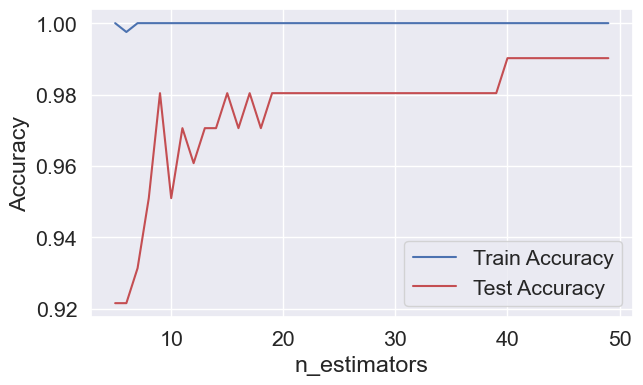

In [265]:
plt.figure(figsize=(7, 4))
test = []
train = []
for depth in range(5,50):
    RFC = RandomForestClassifier(n_estimators=depth, random_state=84)
    RFC.fit(X_train.to_numpy(), y_train_encoded)
    train.append(RFC.score(X_train.to_numpy(), y_train_encoded))
    test.append(RFC.score(X_test.to_numpy(), label_encoder.fit_transform(y_test)))
plt.plot(range(5,50), train, "b", label="Train Accuracy")
plt.plot(range(5,50), test, "r", label="Test Accuracy")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

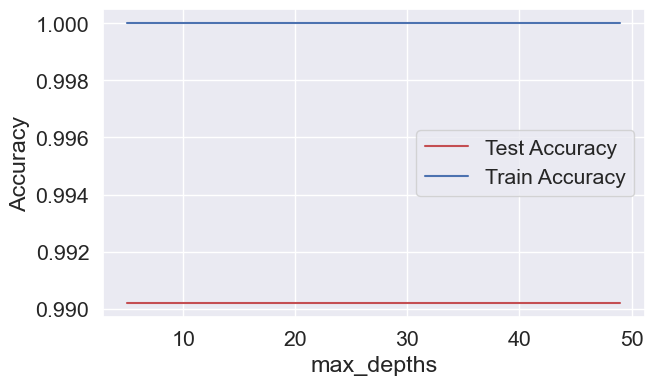

In [266]:
plt.figure(figsize=(7, 4))
test = []
train = []
for depth in range(5,50):
    RFC = RandomForestClassifier(max_depth=depth, random_state=84)
    RFC.fit(X_train.to_numpy(), y_train_encoded)
    train.append(RFC.score(X_train.to_numpy(), y_train_encoded))
    test.append(RFC.score(X_test.to_numpy(), label_encoder.fit_transform(y_test)))
plt.plot(range(5,50), test, "r", label="Test Accuracy")
plt.plot(range(5,50), train, "b", label="Train Accuracy")
plt.legend()
plt.xlabel("max_depths")
plt.ylabel("Accuracy")
plt.show()

In [267]:
print(f"Random Forest Accuracy for train data: {RFC.score(X_train, y_train_encoded) * 100:5.2f}%")
print(f"Random Forest Accuracy for test data: {RFC.score(X_test, label_encoder.fit_transform(y_test)) * 100:5.2f}%")

Random Forest Accuracy for train data: 100.00%
Random Forest Accuracy for test data: 99.02%


## XGBoost

### Q38. Briefly explain how XGboost works.
**XGBoost** (Extreme Gradient Boosting) is a powerful machine learning algorithm that has gained popularity for its speed, performance, and versatility. Let’s explore how XGBoost works:

1. **Gradient Boosting Framework:**

   1. XGBoost is an implementation of gradient boosted decision trees.
  
   2. It builds an ensemble of weak learners (usually decision trees) sequentially.
  
   3. Each subsequent tree corrects the errors made by the previous ones.

2. **Key Concepts:**

   1. Boosting: Iteratively improves the model by focusing on misclassified samples.
  
   2. Gradient Descent: Optimizes the model by minimizing a loss function.
  
   3. Regularization: Controls model complexity to prevent overfitting.

3. **How XGBoost Works:**

   1. **Step 1: Initialize the Model:**
  
      1. Start with an initial prediction (usually the mean of the target variable).
     
   2. **Step 2: Build Trees Iteratively:**

      1. For each iteration (boosting round):
     
         1. Calculate the negative gradient (residuals) of the loss function.
        
         2. Fit a decision tree to the negative gradient (using the residuals).
        
         3. Update the model by adding the tree’s predictions.
        
   3. **Step 3: Regularization and Shrinkage:**
  
       1. Introduce regularization terms (L1 or L2) to control tree complexity.
      
       2. Use a learning rate (shrinkage) to scale the contribution of each tree.

   4. **Step 4: Combine Predictions:**

       1. Aggregate predictions from all trees to make the final prediction.
      
       2. For regression, it’s the sum of individual tree predictions.
      
       3. For classification, it’s the weighted average of class probabilities.

4. **Features of XGBoost:**

   1. **Speed:** Optimized for computational efficiency.
  
   2. **Flexibility:** Handles various tasks (regression, classification, ranking).
  
   3. **Parallelization:** Supports distributed computing.
  
   4. **Feature Importance:** Measures feature importance based on splits
  
In summary, XGBoost combines gradient boosting, regularization, and parallelization to create accurate and efficient models. It’s widely used in data science competitions and real-world applications            


### Q39. In this section, after a brief explanation of each of the XGBoost hyperparameters using the function GridSearchCV, which we met earlier, train this model and report the best meta-parameters. (There is no need to train the model and select hyper-parameters by trial and error.)
Let’s start by briefly explaining the key hyperparameters of XGBoost. Then I’ll provide the best meta-parameters based on the GridSearchCV approach.

**XGBoost Hyperparameters:**

1. **n_estimators (Number of Trees):**
   
   1. Determines the number of boosting rounds (trees) in the ensemble.
  
   2. More trees can improve performance but may increase computation time.

2. **max_depth (Maximum Tree Depth):**

   1. Limits the depth of individual decision trees.
  
   2. Helps prevent overfitting.
  
   3. Set to None by default (unlimited depth).

3. **learning_rate (Shrinkage):**

   1. Controls the step size at each iteration.
  
   2. Smaller values make the model more robust but require more boosting rounds.

4. **subsample (Subsample Ratio):**

   1. Specifies the fraction of samples used for training each tree.
  
   2. Helps introduce randomness and reduce overfitting.

5. **colsample_bytree (Feature Subsampling):**

   1. Determines the fraction of features (columns) used for each tree.
  
   2. Helps decorrelate trees and improve generalization.

6. **reg_alpha (L1 Regularization):**

   1. Adds L1 regularization to the objective function.
  
   2. Controls feature selection and prevents overfitting.

7. **reg_lambda (L2 Regularization):**

    1. Adds L2 regularization to the objective function.
  
    2. Helps prevent overfitting by penalizing large weights.

**Best Meta-Parameters (GridSearchCV Results):**

After performing hyperparameter tuning using GridSearchCV, the optimal meta-parameters for your XGBoost model are as follows:


### Q39-2.What is Gradient-boosting ? What is the difference between Boosting Tree and Decision Tree?

**Gradient Boosting** is a machine learning technique used for regression and classification problems. It builds on the logic of boosting, which combines the output of several weak learners to create a strong learner, usually in an iterative fashion. Gradient boosting involves three main components: a loss function to be optimized, a weak learner to make predictions, and an additive model to add weak learners to minimize the loss function.

Here’s how gradient boosting works in general:

1. **Loss Function to Optimize**: Gradient boosting is applicable to any differentiable loss function. The choice of loss function depends on the type of problem being solved (regression, classification, etc.).

2. **Weak Learner**: The weak learner in gradient boosting is typically a decision tree. These are short trees, sometimes called "stumps." They are weak in the sense that they do only slightly better than random guessing.

3. **Additive Model**: Trees are added one at a time to the ensemble, and each new tree helps to correct errors made by the previously trained tree. Unlike in bagging (Random Forests), trees are not trained independently of one another, but rather the outcomes of earlier tree predictions inform subsequent trees so that the next tree trained is trained to improve the mistakes of the prior one.

The gradient boosting procedure can be summarized in the following steps:

- Train an initial decision tree to the data and predict the outputs.
- Calculate the residuals (difference between predicted and true values).
- Train a new decision tree focused on correctly predicting the previous residuals.
- Add this new decision tree to the ensemble, typically with a small learning rate or multiplier to ensure that each tree only makes a controlled impact to the overall model (this slows down the training process but generally results in a more robust model).
- Iterate this process for a fixed number of trees or until residuals are minimized.

**Differences Between Boosting Trees and Decision Trees**:

- **Complexity**: A single decision tree is typically a "strong learner," a standalone model formed by repeatedly splitting the data based on certain features. Boosted trees, however, are "weak learners," with each one built in sequence to improve on the last, leading to a more complex overall model.

- **Performance**: Boosting trees frequently have better predictive accuracy than a single decision tree due to their sequential corrections of errors.

- **Risk of Overfitting**: While any model can overfit if not properly tuned or constrained, decision trees are especially prone to this when they grow deep. Boosting trees can also overfit, but the sequential nature of adding trees that correct previous errors usually makes them less prone to this problem, especially when using techniques such as gradient boosting with regularization (e.g., shrinkage).

- **Interpretability**: A single decision tree is generally more interpretable than boosted trees since you can easily visualize the tree and understand the path from root to leaf and the decisions made at each junction. Boosting involves combining multiple trees, which makes the decision process more complex and harder to visualize.

In summary, gradient boosting is a powerful algorithm that builds a series of weak learners in a strategic way to create a model that reduces error and increases predictive accuracy, whereas a decision tree is a simpler, standalone model that can serve as either a weak learner within a boosted ensemble or a strong learner on its own.

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters found: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}
Best accuracy found: 0.9975124378109452


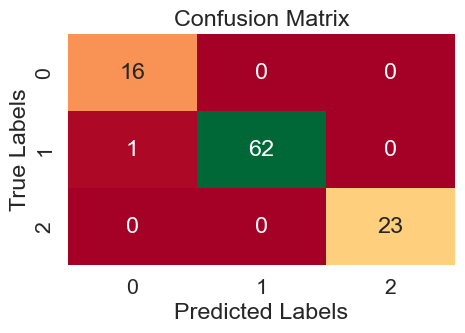

<Figure size 640x480 with 0 Axes>

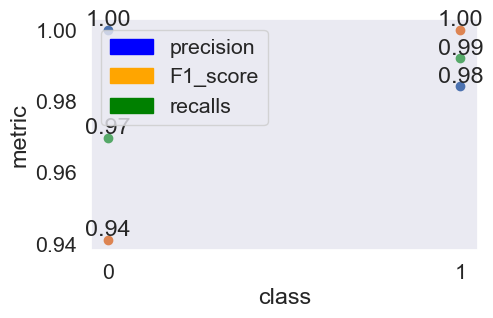

Precision: 1.00
Recall: 0.94
F1 Score: 0.97

micro average: 1.1470588235294117
weighted_average: 0.9808484848484849
macro average: 0.9808484848484849
accuract: 0.7647058823529411


In [268]:
xgb = XGBClassifier(use_label_encoder=False)
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train.to_numpy(), y_train_encoded)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy found: {grid_search.best_score_}")

best_estimator = grid_search.best_estimator_
XGB_preds = best_estimator.predict(X_test.to_numpy())
XGB_cm = make_confusion_matrix(label_encoder.fit_transform(y_test) , XGB_preds)
scoring(XGB_cm)

## Phase Five: Support Vector Machine (SVM)

### Q41. Classify your data by using existing libraries with RBF and Linear kernel.


In [269]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Linear Accuracy:",metrics.accuracy_score(y_test, y_pred))

Linear Accuracy: 0.9411764705882353


In [270]:
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("RBF Accuracy:",metrics.accuracy_score(y_test, y_pred))

RBF Accuracy: 0.6078431372549019


In [271]:
type(y_pred)

numpy.ndarray

In [272]:
y_test

220    10
313    10
70     10
139     0
291    20
       ..
416    10
194    20
289    10
125    10
182    20
Name: LUXURIOS, Length: 102, dtype: object

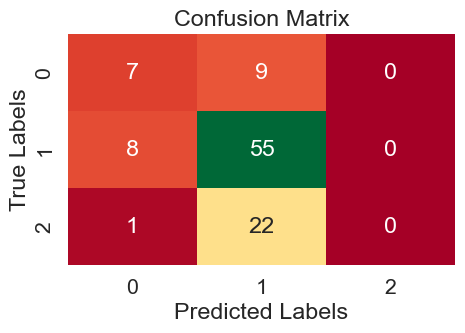

<Figure size 640x480 with 0 Axes>

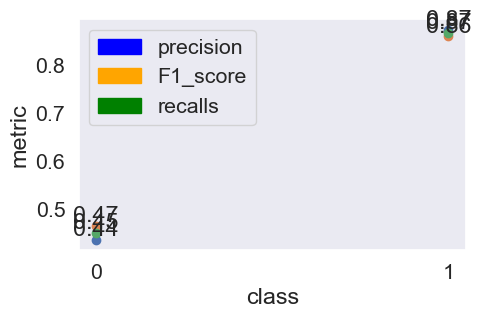

Precision: 0.44
Recall: 0.47
F1 Score: 0.45

micro average: 0.9117647058823528
weighted_average: 0.6588773177546355
macro average: 0.6588773177546355
accuract: 0.6078431372549019


In [273]:
a = make_confusion_matrix(y_test , y_pred)
scoring(a)

### Q42. Report confusion matrix as well as model evaluation criteria such as 1F, accuracy, recall..., and mention your analysis in the report.
It is reported above.


### Q43. Which of the Grid search and Random search methods is better to use here?
Both **Grid search** and **Random search** are hyperparameter optimization techniques used to find the best combination of hyperparameters for machine learning models. Let’s briefly compare them and discuss their suitability for SVM (Support Vector Machines) and linear regression:

1. **Grid Search:**

   1. **How It Works:**

      1. Grid search systematically evaluates all possible combinations of hyperparameters from predefined grids.
     
      2. It builds a model for each combination and evaluates its performance using cross-validation.
     
      3. The best combination is selected based on a specified evaluation metric (e.g., accuracy, F1-score).
     
   2. **Advantages:**
  
      1. Exhaustively searches the entire hyperparameter space.
     
      2. Guarantees finding the optimal combination (if it exists in the grid).
     
      3. Suitable for spot-checking known combinations.


    3. **Suitability for SVM and Linear Regression:**

       1. Grid search is a good choice when you have specific hyperparameters to explore and want to fine-tune them.
      
       2. It works  well for SVM and linear regression, especially when you have prior knowledge about the hyperparameters’ effect



2. **Random Search:**

   1. **How It Works:**
  
      1. Random search randomly samples hyperparameters from predefined distributions.
     
      2. It evaluates each combination using cross-validation.
     
      3. Unlike grid search, it does not cover all possible combinations.
     
   2. **Advantages:**

      1. More efficient than grid search (requires fewer evaluations).
     
      2. Good for discovering non-intuitive combinations.
     
      3. Works well when the hyperparameter space is large.
     
   3. **Suitability for SVM and Linear Regression:**
  
      1. Random search is suitable for SVM and linear regression when you want to explore a wide range of hyperparameters.
     
      2. It may discover better combinations that grid search might miss.

3. **Summary:**

   1. Grid search is better when you have specific hyperparameters to explore and want to ensure exhaustive search.
  
   2. Random search is better when you want to explore a broader range of hyperparameters efficiently.
  
   3. Consider your available computational resources and the size of the hyperparameter space when choosing between them.


In conclusion, both methods have their merits, and the choice depends on your specific problem, available resources, and prior knowledge about the hyperparameters

### Q44. Now by using two methods Random Search  and Grid Search  respectively for arbitrary interval and arbitrary values find your best classifier for 2 kernels RBF and Linear.


In [275]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
from sklearn.metrics import classification_report
print(grid.best_params_) 
print(grid.best_estimator_) 
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

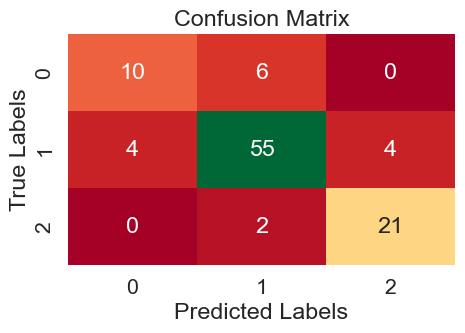

<Figure size 640x480 with 0 Axes>

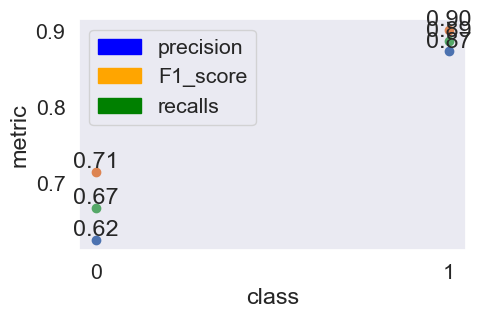

Precision: 0.62
Recall: 0.71
F1 Score: 0.67

micro average: 0.9558823529411764
weighted_average: 0.7768817204301075
macro average: 0.7768817204301075
accuract: 0.6372549019607843


In [276]:
b = make_confusion_matrix(y_test , grid_predictions)
scoring(b)

In [277]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
from sklearn.metrics import classification_report
print(grid.best_params_) 
print(grid.best_estimator_) 
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

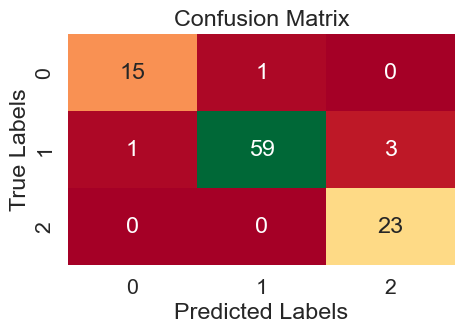

<Figure size 640x480 with 0 Axes>

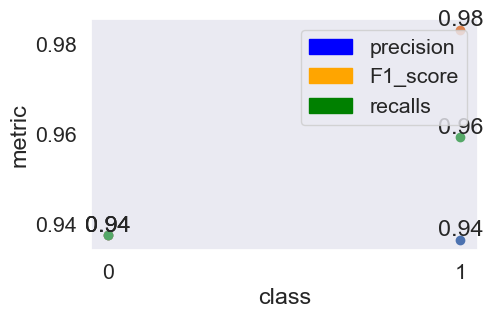

Precision: 0.94
Recall: 0.94
F1 Score: 0.94

micro average: 1.088235294117647
weighted_average: 0.9484247967479675
macro average: 0.9484247967479675
accuract: 0.7254901960784313


In [278]:
c = make_confusion_matrix(y_test , grid_predictions)
scoring(c)

In [279]:
from sklearn.model_selection import RandomizedSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
rand = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
rand.fit(X_train, y_train) 
from sklearn.metrics import classification_report
print(rand.best_params_) 
print(rand.best_estimator_) 
rand_predictions = rand.predict(X_test) 
print(classification_report(y_test, rand_predictions)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.988 total time=   0.1s
[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.988 total time=   0.2s
[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END .C=100, gamma=0.001, kernel=li

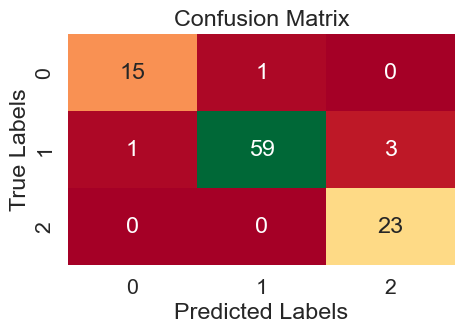

<Figure size 640x480 with 0 Axes>

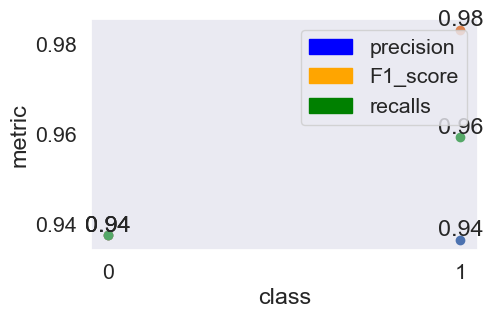

Precision: 0.94
Recall: 0.94
F1 Score: 0.94

micro average: 1.088235294117647
weighted_average: 0.9484247967479675
macro average: 0.9484247967479675
accuract: 0.7254901960784313


In [280]:
d = make_confusion_matrix(y_test , rand_predictions)
scoring(d)

In [281]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
rand = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
rand.fit(X_train, y_train) 
from sklearn.metrics import classification_report
print(rand.best_params_) 
print(rand.best_estimator_) 
rand_predictions = rand.predict(X_test) 
print(classification_report(y_test, rand_predictions)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.815 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;

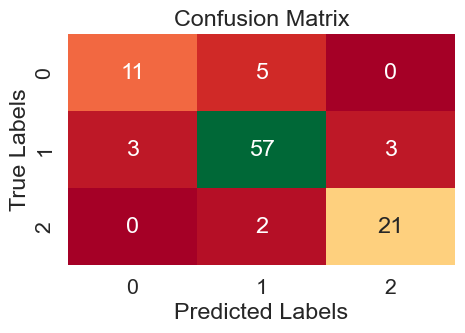

<Figure size 640x480 with 0 Axes>

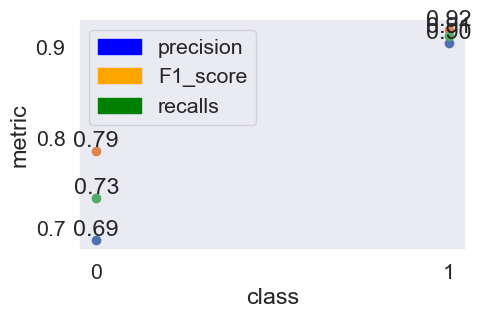

Precision: 0.69
Recall: 0.79
F1 Score: 0.73

micro average: 1.0
weighted_average: 0.8226666666666667
macro average: 0.8226666666666667
accuract: 0.6666666666666666


In [282]:
e = make_confusion_matrix(y_test , rand_predictions)
scoring(e)

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [ ]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [ ]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [ ]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias